 This is the ensemble file listing all the analysis in the paper


In [2]:
from src import params
import pandas as pd
from src import Models
from pathlib import Path
from src.Evaluate import metric,print_model_fits,sl_eva
from src import Shap
from src import SuperLearner

In [3]:
platform = "jupyter"
params.confirm_cwd(platform)
model_params = params.model_params

cwd: /Users/valler/Python/OX_Thesis/OX_thesis


# Model Prediction


## HRS

In [10]:
df = params.data_reader(dataset='HRS',source='us',bio=False)
for model_name in ['lgb','xgb']:
    print(f'model is {model_name}-----------------')
    model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain='all', model=model_name, train_subset_size=1, order=0)
    print_model_fits(evas=metric(model))

model is lgb-----------------
seed is 87785
imv=0.2038370443560898,
roc-auc=0.8246432517789302,
pr-auc=0.6866060054221803,
f1=0.5848540145985401,
efron_r2=0.28975000906425197,
ffc_r2=0.5635980125034004,
IP=0.2933066722795201
model is xgb-----------------
seed is 87785
imv=0.13950427649140423,
roc-auc=0.7979042175022075,
pr-auc=0.6458229924593557,
f1=0.5542168674698795,
efron_r2=0.21347014251285568,
ffc_r2=0.5167290427127114,
IP=0.2933066722795201


## SHARE

In [4]:
df = params.data_reader(dataset='SHARE',source='us',bio=False)
domain_name = 'share_all'
# recode a new domain dict for SHARE  based on its columns
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))
# fit model
for model_name in ['lgb','xgb']:
    print(f'model is {model_name} -----------------')
    model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model=model_name, train_subset_size=1, order=0)
    print_model_fits(evas=metric(model))

model is lgb -----------------
seed is 87785
imv=0.07995811998553994,
roc-auc=0.8032412874090527,
pr-auc=0.5283903453496347,
f1=0.44573643410852715,
efron_r2=0.21730539088632606,
ffc_r2=0.4605976417000187,
IP=0.2021227503461006
model is xgb -----------------
seed is 87785
imv=0.052965635671908276,
roc-auc=0.774615717794262,
pr-auc=0.48777084474272525,
f1=0.4222011385199241,
efron_r2=0.15517920388524353,
ffc_r2=0.41778271568626024,
IP=0.2021227503461006


## ELSA

In [20]:
df = params.data_reader(dataset='ELSA',source='us',bio=False)
df=df.loc[0:7731]
df['death'].replace({-1:0,1:1},inplace=True)

domain_name = 'elsa_all'
# recode a new domain dict for SHARE  based on its columns
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))

# fit model
for model_name in ['lgb','xgb']:
    print(f'model is {model_name} -----------------')
    model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model=model_name, train_subset_size=1, order=0)
    print_model_fits(evas=metric(model))

model is lgb -----------------
imv=0.015471586098013782,
roc-auc=0.9099000410790086,
pr-auc=0.26582103116054573,
f1=0.12213740458015268,
efron_r2=0.10144130519615524,
ffc_r2=0.22825464401628026,
IP=0.056910569105691054
model is xgb -----------------
imv=0.008809570901578589,
roc-auc=0.8961696936501811,
pr-auc=0.2511003781086692,
f1=0.19718309859154934,
efron_r2=0.06732185193920481,
ffc_r2=0.1989504597131021,
IP=0.056910569105691054


## Combination Prediction


In [3]:
df,domain_lst = params.read_merged_data()
domain_name = 'combine_all'
model_params['domain_dict'][domain_name]=domain_lst
print(f'there are {len(domain_lst)} vars and they are \n{domain_lst}')

there are 26 vars and they are 
['modactivityYN', 'maleYN', 'everrent', 'Zfatherseduc', 'nevermarried', 'everdivorced', 'ZwealthT', 'rocc', 'Zhopelessness', 'dataset', 'migrantYN', 'currsmokeYN', 'Zpessimism', 'Zeduccat', 'sumadultAE', 'Zperceivedconstraints', 'sleepYN', 'everunemployed', 'fathersocc', 'Zposaffect', 'eversmokeYN', 'Zmotherseduc', 'Znegaffect', 'vigactivityYN', 'Zoptimism', 'age']


In [4]:
for model_name in ['lgb','xgb']:
    print(f'model is {model_name} -----------------')
    model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model=model_name, train_subset_size=1, order=0)
    print_model_fits(evas=metric(model))


model is lgb -----------------
imv=0.12220872894194847,
roc-auc=0.8409153474519705,
pr-auc=0.6300949522339903,
f1=0.5224476753474996,
efron_r2=0.2927094230441343,
ffc_r2=0.5289332324147182,
IP=0.22464295574910267
model is xgb -----------------
imv=0.1393862005719722,
roc-auc=0.8632039335788511,
pr-auc=0.6779311063954588,
f1=0.5710271620355917,
efron_r2=0.3468953154280685,
ffc_r2=0.5650218980998778,
IP=0.22464295574910267


# SHAP


## HRS


In [3]:
# fit model
df = params.data_reader(dataset='HRS',source='us',bio=False)
model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain='all', model='lgb',
                                     train_subset_size=1, order=0)
print_model_fits(evas=metric(model))
# calcualte shap
shap_values_test,shap_dict = Shap.shap_values_and_dict(model)


seed is 87785
imv=0.2038370443560898,
roc-auc=0.8246432517789302,
pr-auc=0.6866060054221803,
f1=0.5848540145985401,
efron_r2=0.28975000906425197,
ffc_r2=0.5635980125034004,
IP=0.2933066722795201


### shap rank bar plot

In [4]:
Shap.shap_rank_bar_plot(shap_values_test=shap_values_test,
                   var_dict=model_params['var_dict'],
                   max_display=shap_values_test.shape[1])


### top_10_scatter_plot

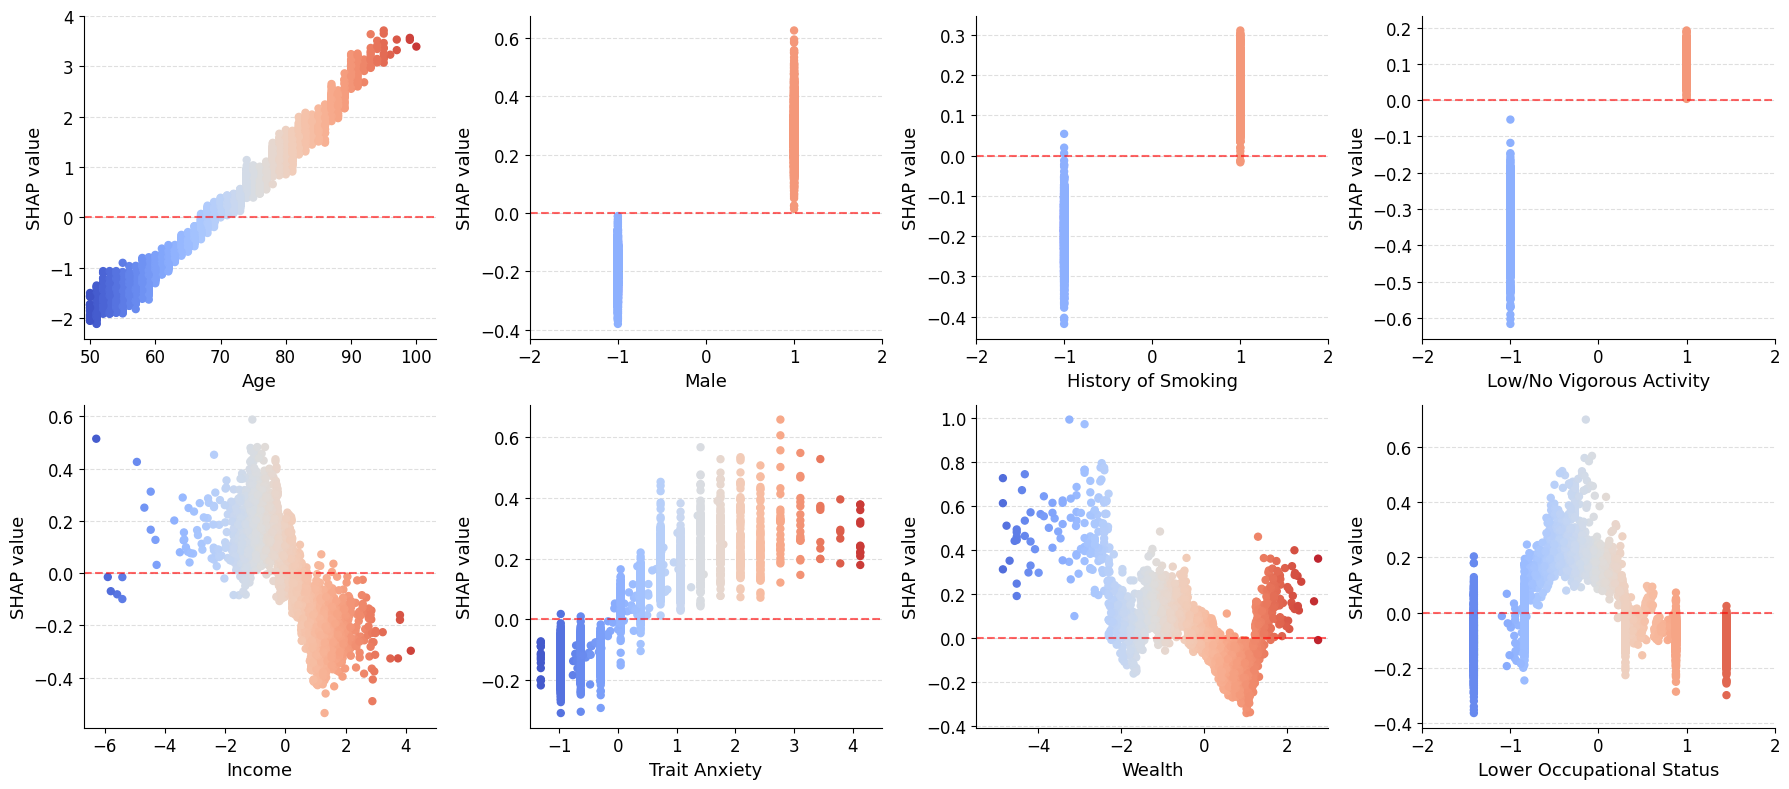

In [6]:
Shap.top_10_scatter_plot(shap_values_test=shap_values_test,var_dict=model_params['var_dict'])

## SHARE  

In [9]:
df = params.data_reader(dataset='SHARE',source='us',bio=False)
domain_name = 'share_all'
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))
model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model='lgb',
                                     train_subset_size=1, order=0)
shap_values_test,shap_dict = Shap.shap_values_and_dict(model)


seed is 87785


###   shap rank bar plot

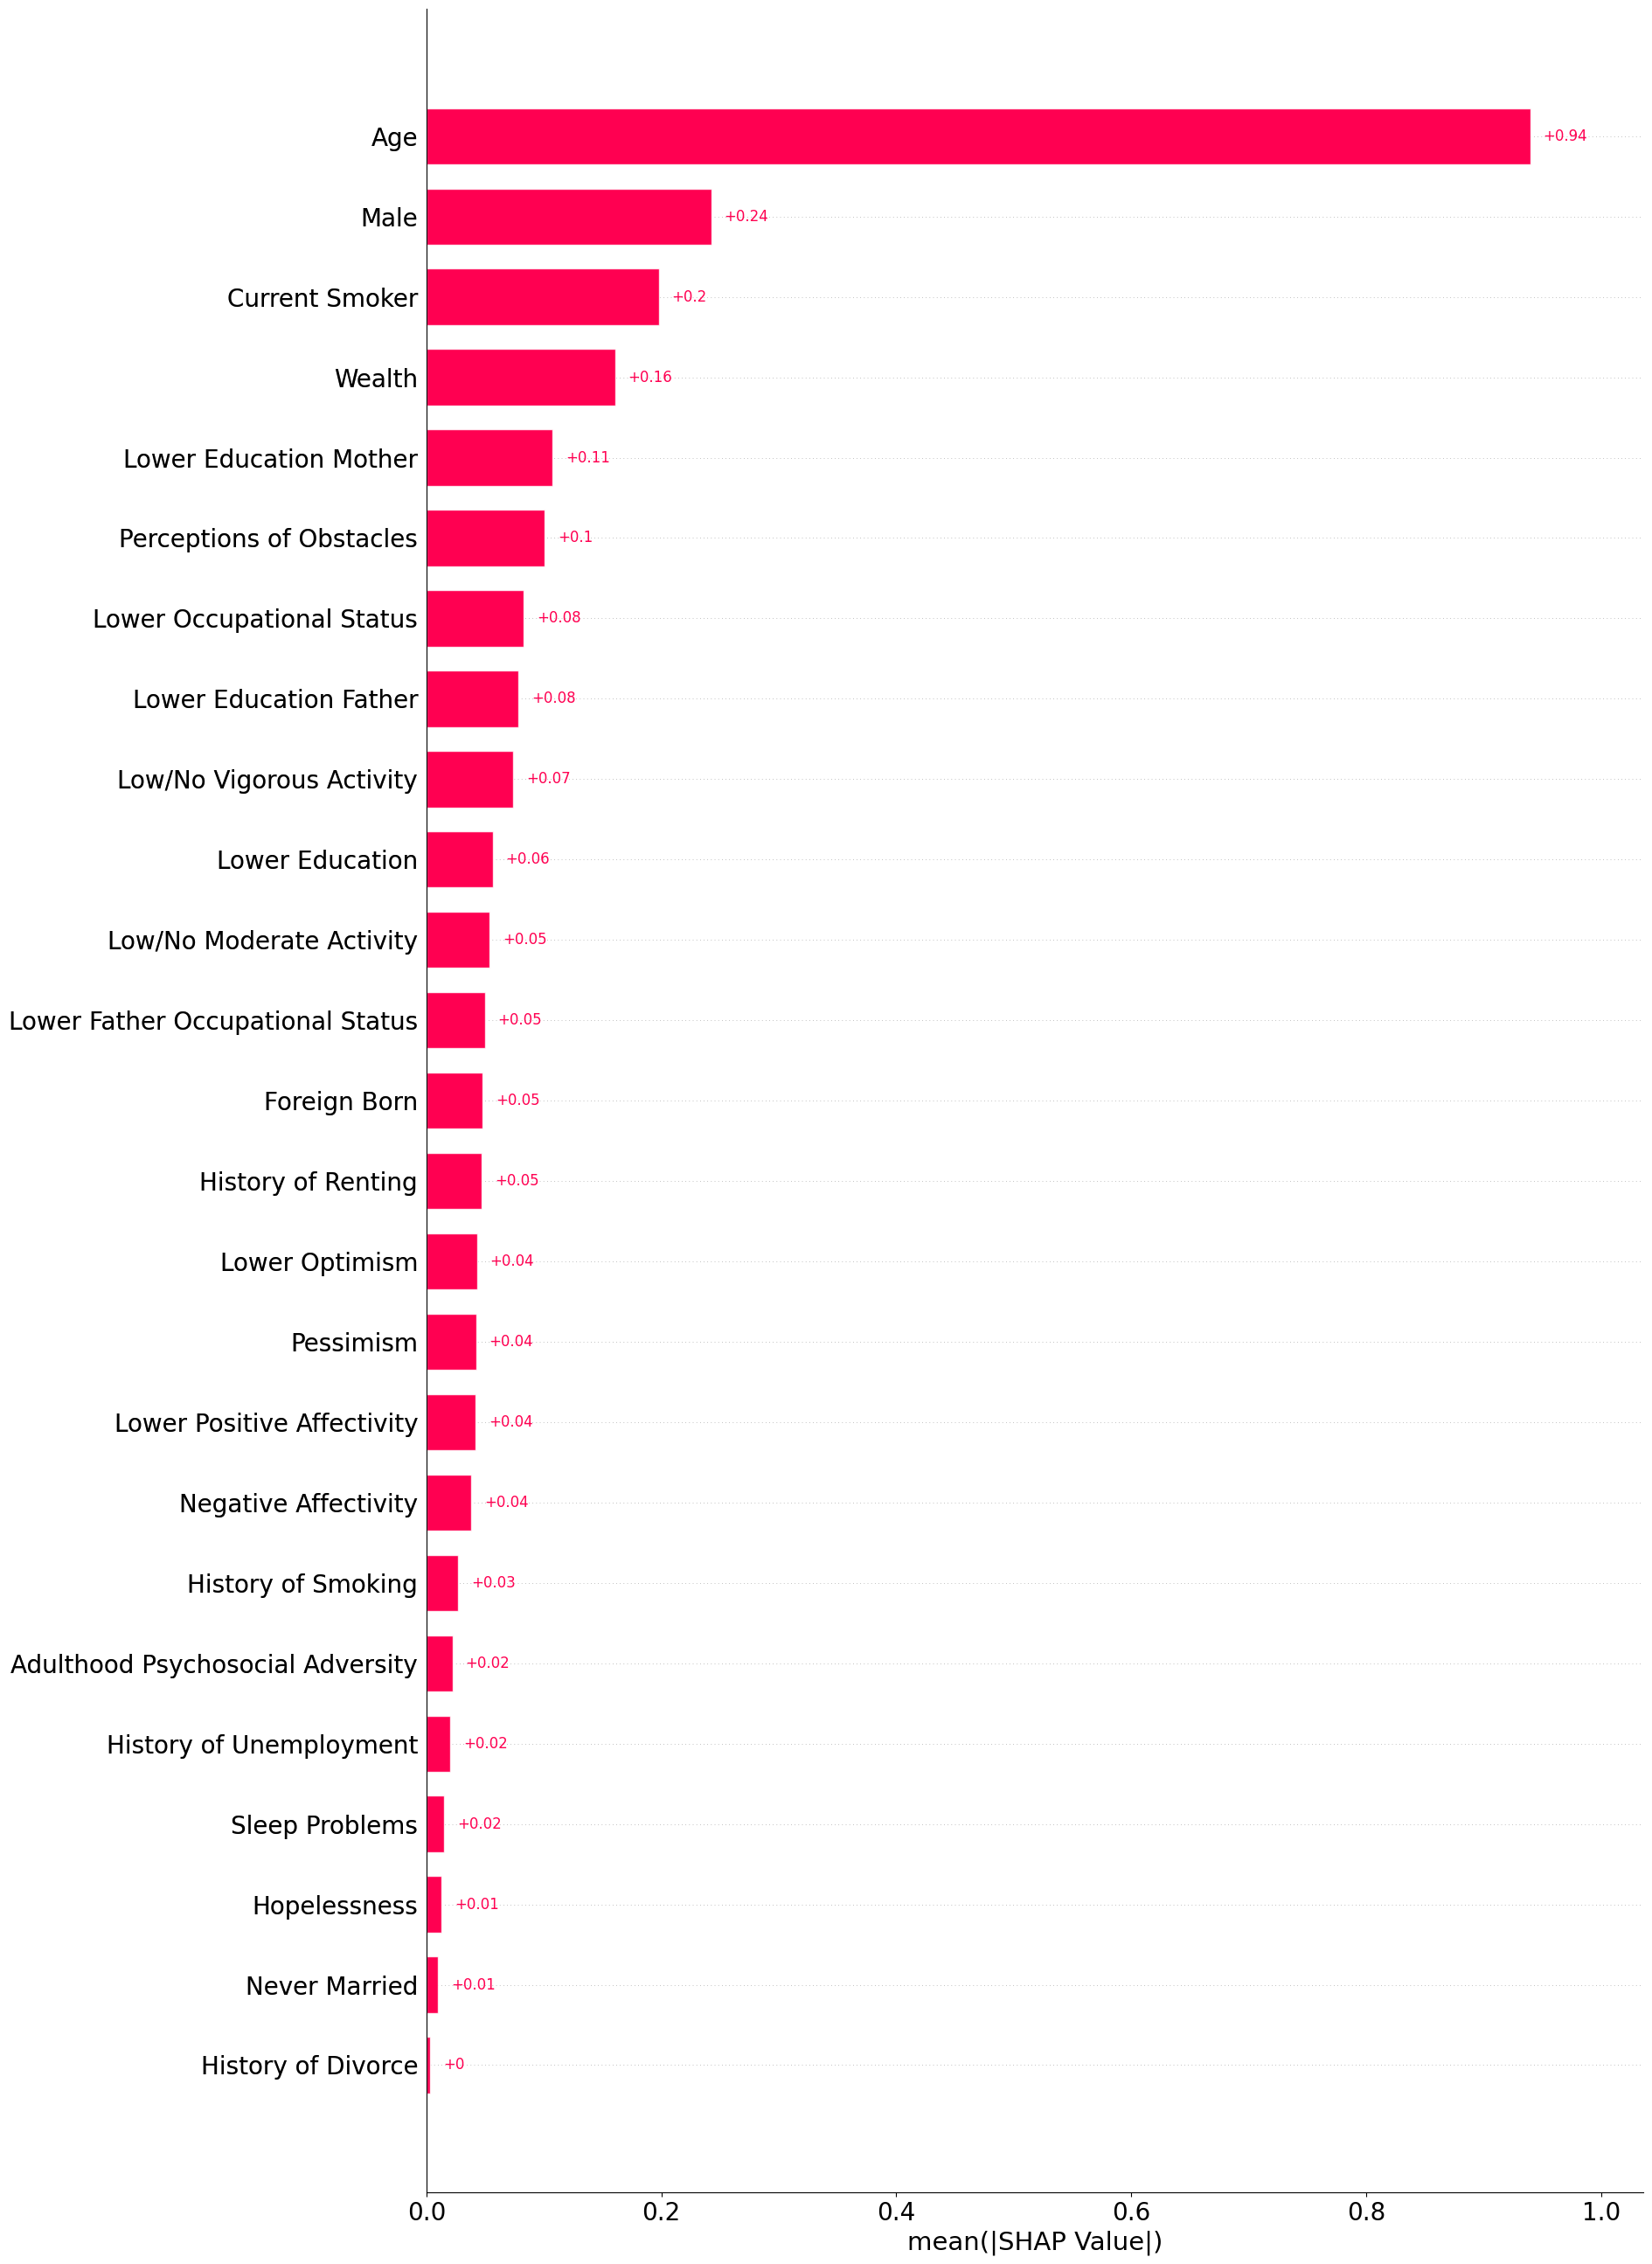

In [10]:
Shap.shap_rank_bar_plot(shap_values_test=shap_values_test,
                   var_dict=model_params['var_dict'],
                   max_display=shap_values_test.shape[1])


###  top 6 scatterplot

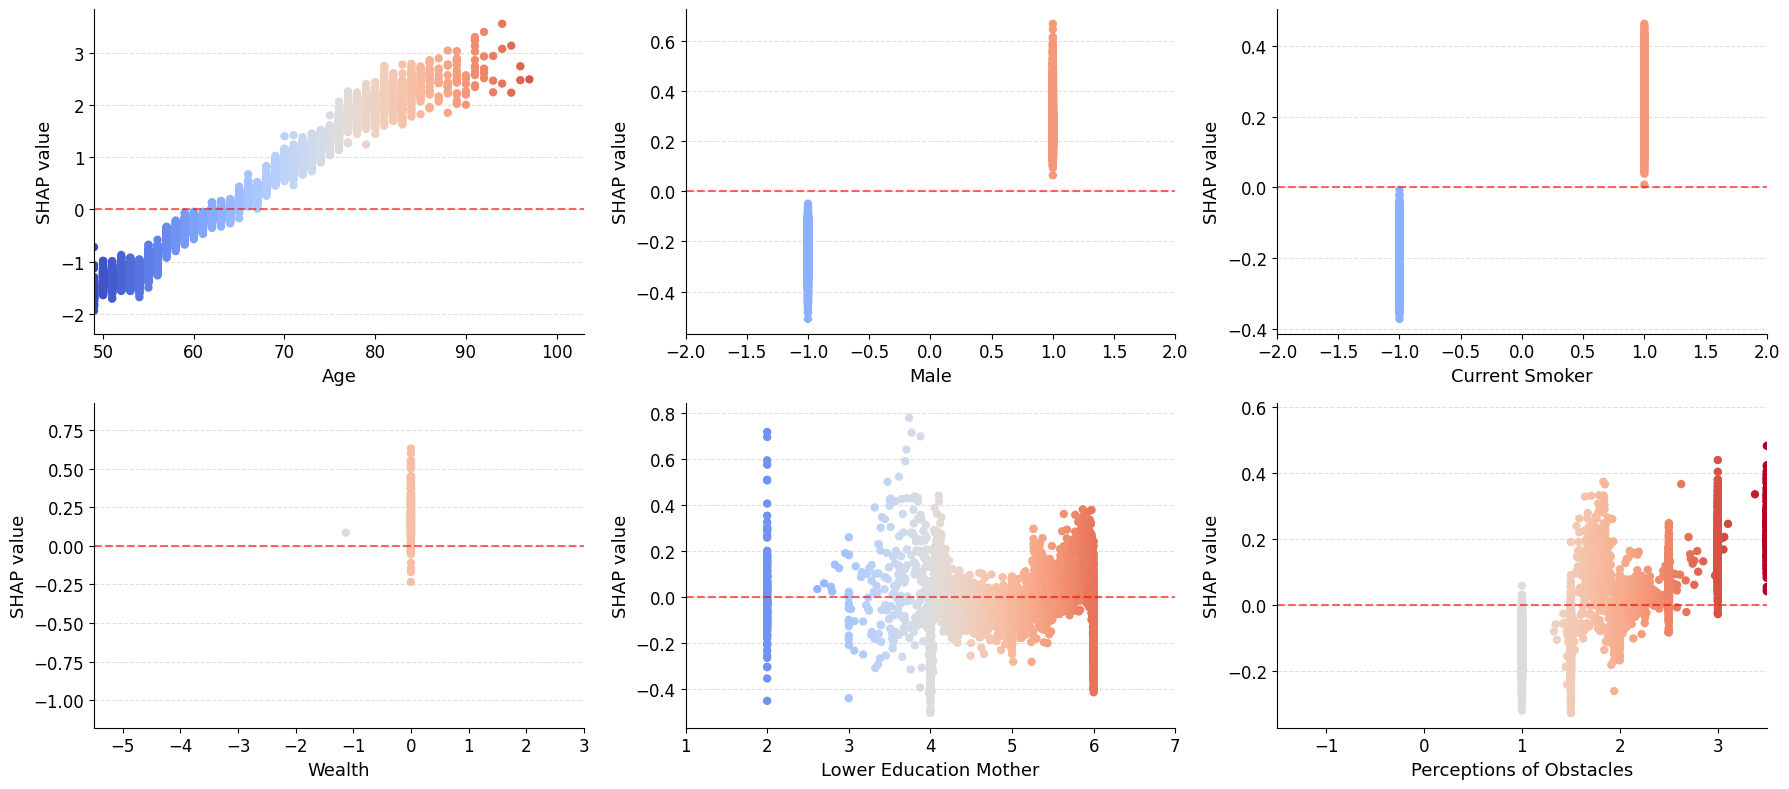

In [11]:
Shap.top_10_scatter_plot(shap_values_test=shap_values_test,var_dict=model_params['var_dict'])

## ELSA

In [5]:
df = params.data_reader(dataset='ELSA',source='us',bio=False)
domain_name = 'elsa_all'
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))
model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model='lgb',
                                     train_subset_size=1, order=0)
shap_values_test,shap_dict = Shap.shap_values_and_dict(model)


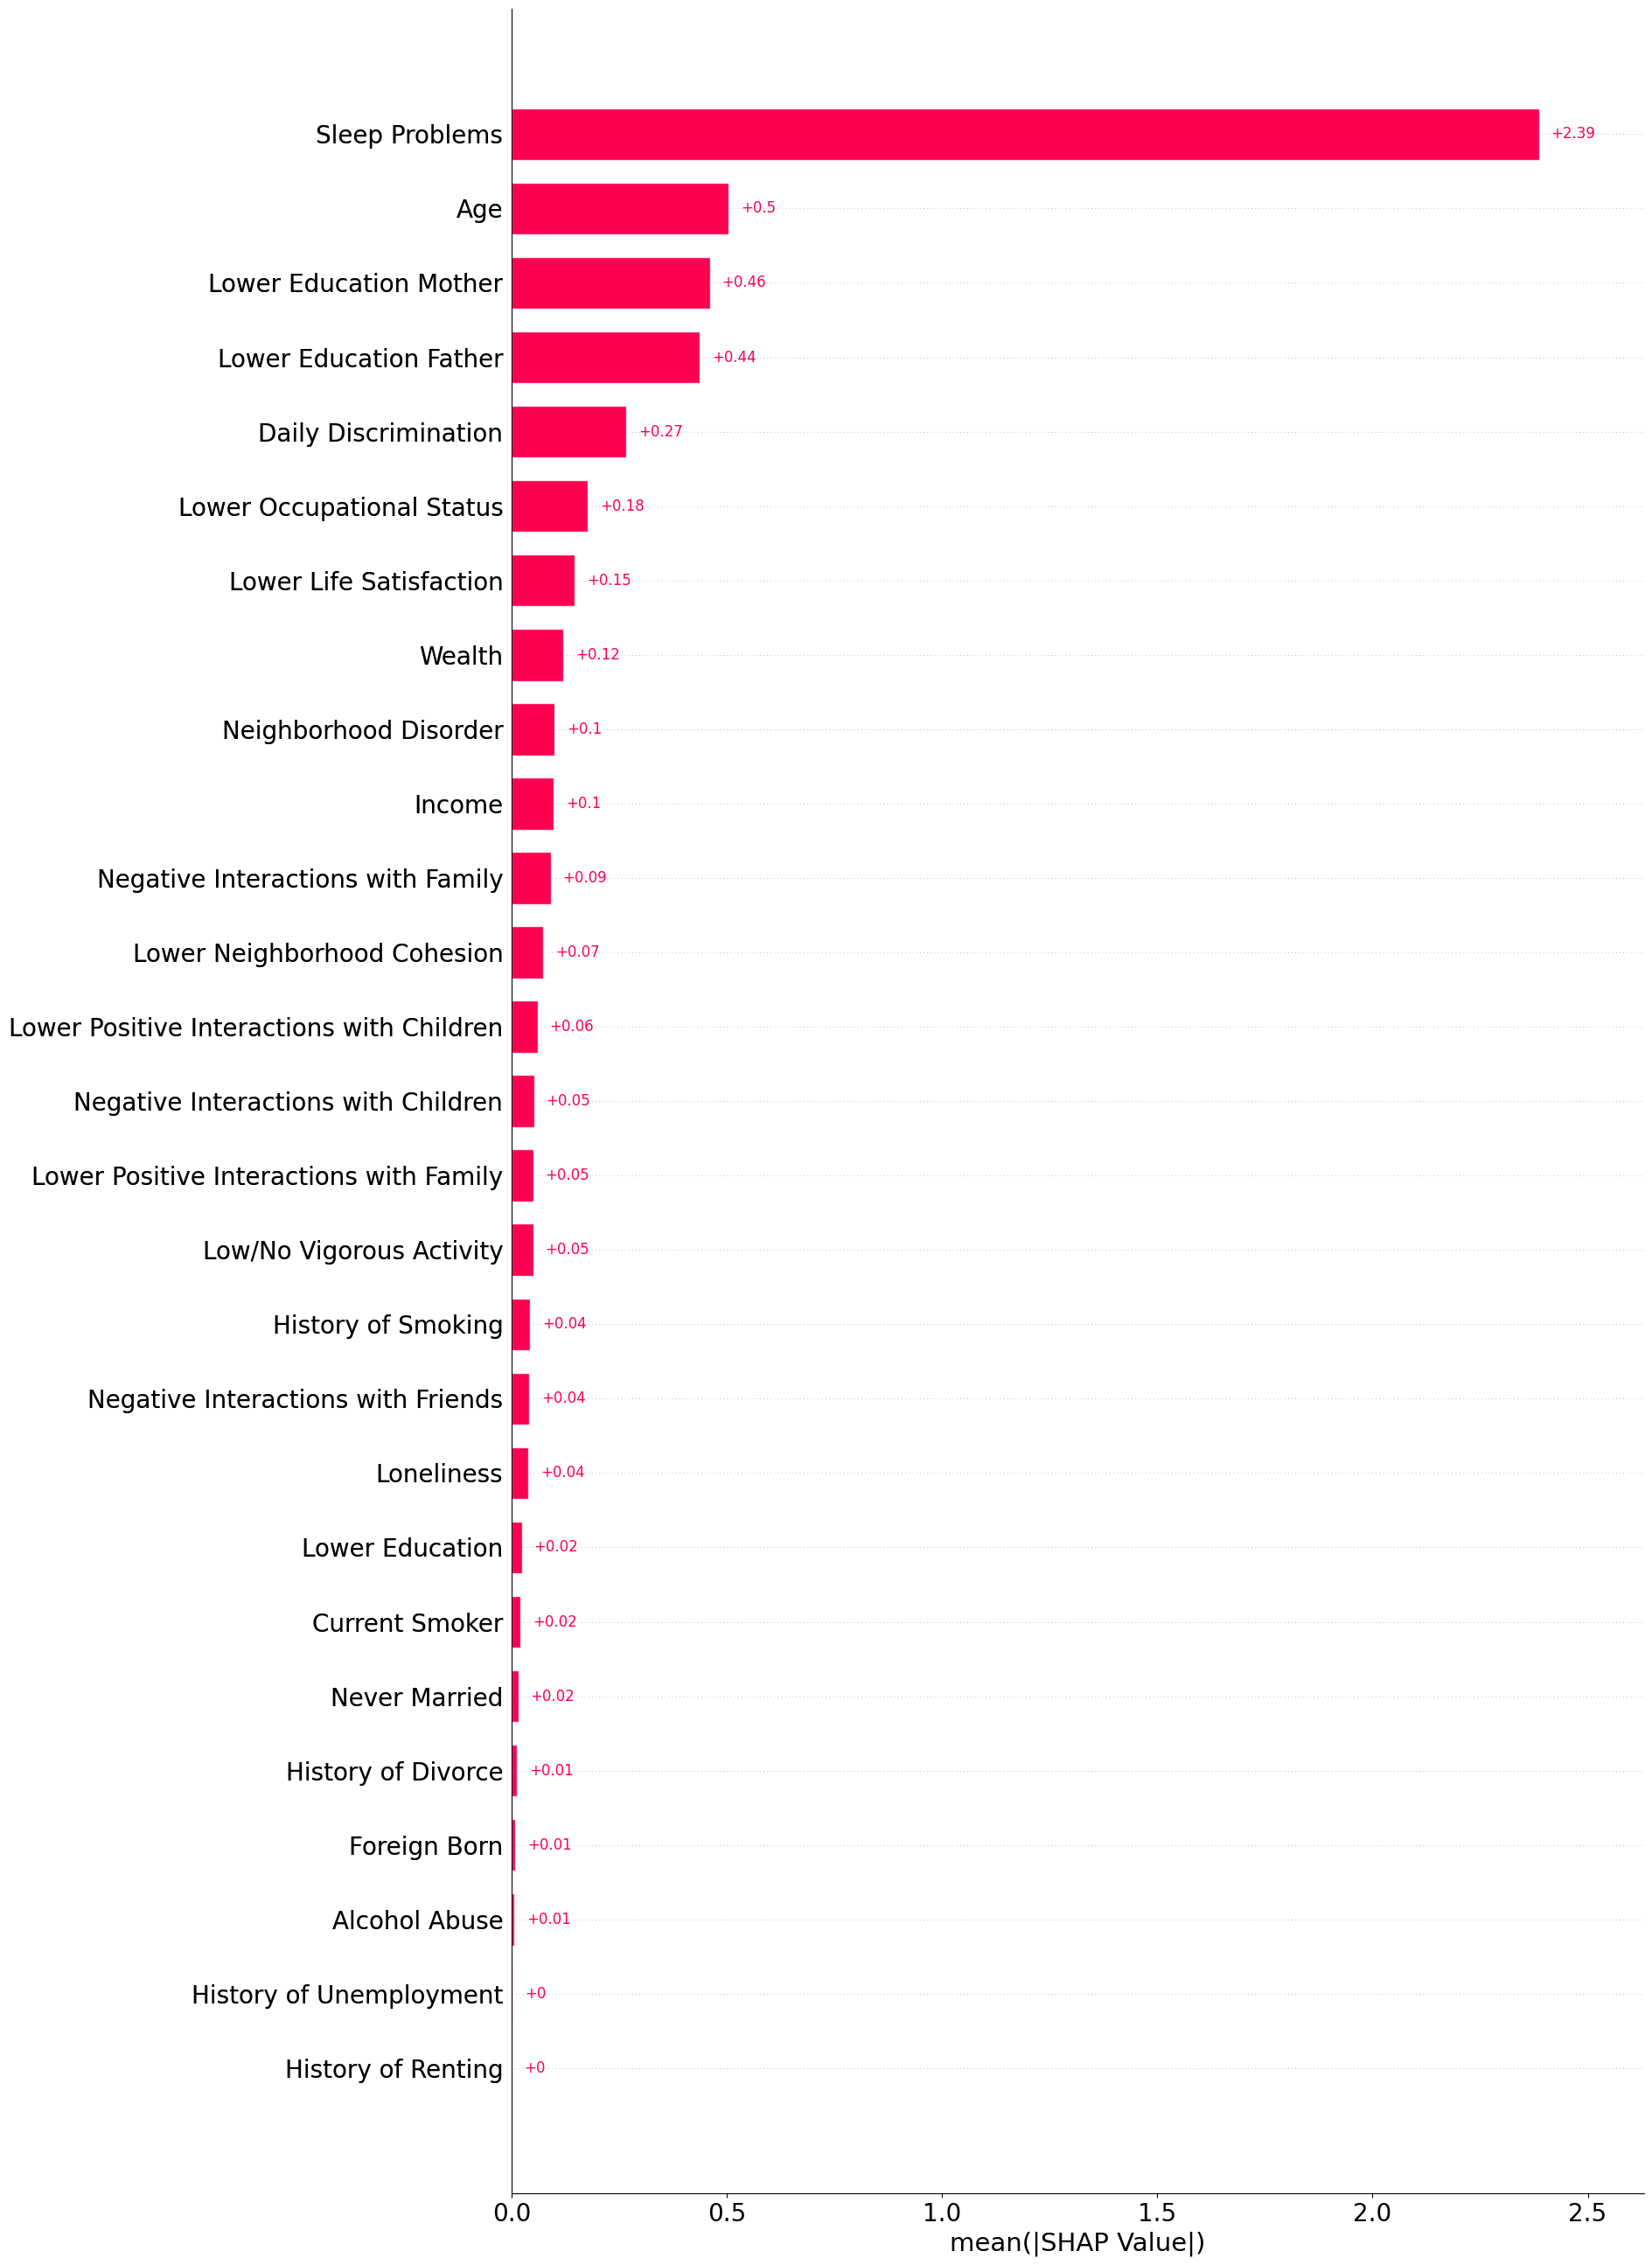

In [6]:
Shap.shap_rank_bar_plot(shap_values_test=shap_values_test,
                   var_dict=model_params['var_dict'],
                   max_display=shap_values_test.shape[1])


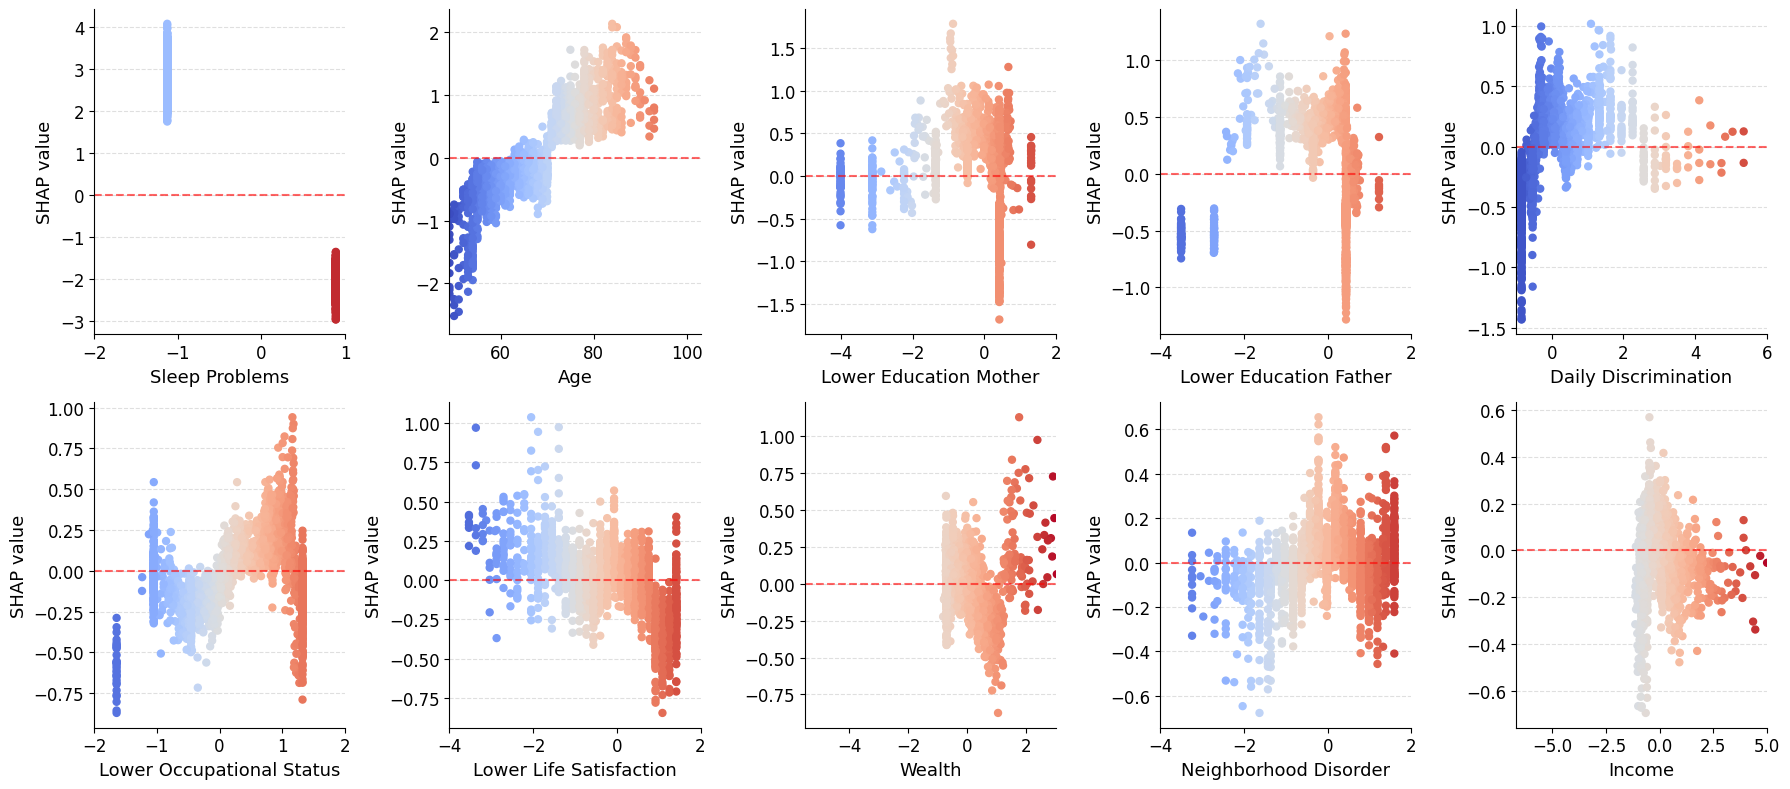

In [7]:
Shap.top_10_scatter_plot(shap_values_test=shap_values_test,var_dict=model_params['var_dict'])

## Combination 

In [9]:
domain_name = 'combination_all'
df,model_params['domain_dict'][domain_name] = params.read_merged_data()
#model_params['domain_dict'][domain_name].remove('hhid')
#model_params['domain_dict'][domain_name].remove('pn')
model_params['var_dict']['dataset']='Datasource'
model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model='lgb', train_subset_size=1, order=0)
shap_values_test,shap_dict = Shap.shap_values_and_dict(model)


In [16]:
df['modactivityYN'].value_counts()

-1.000    39763
 1.000    17150
-0.364        2
-0.776        2
Name: modactivityYN, dtype: int64

### shap rank bar plot 

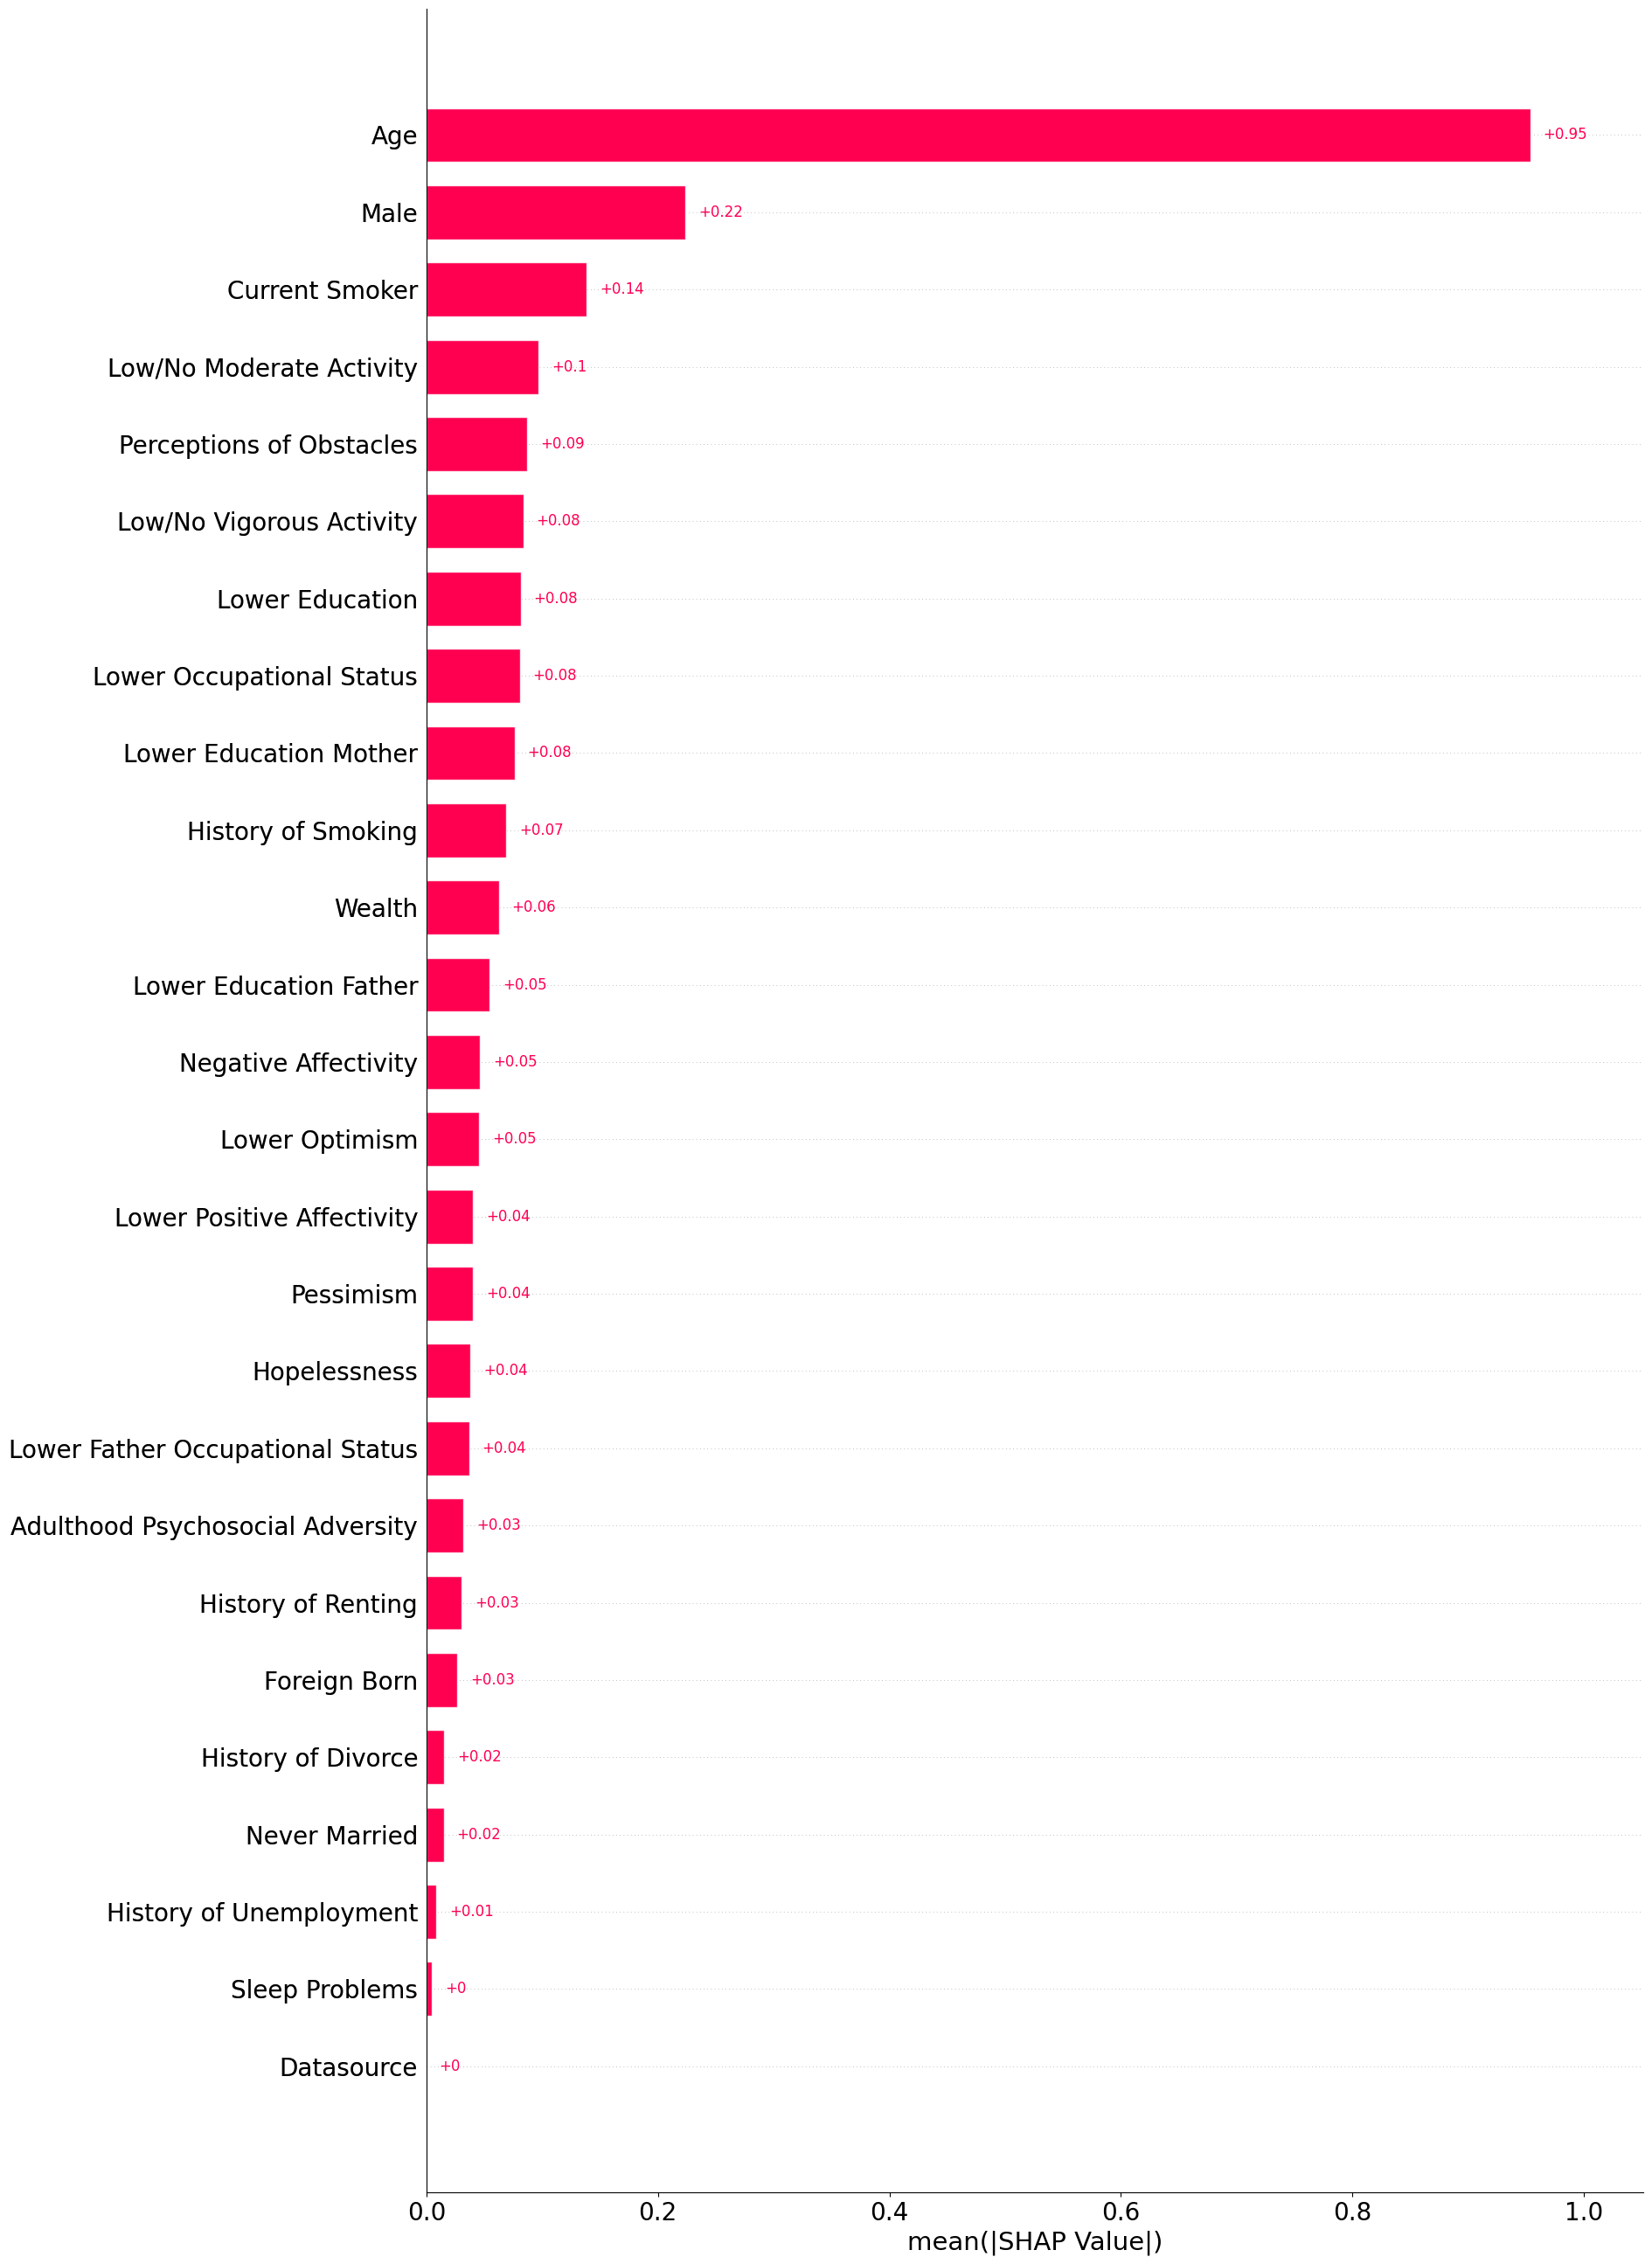

In [10]:
Shap.shap_rank_bar_plot(shap_values_test=shap_values_test,var_dict=model_params['var_dict'], max_display=shap_values_test.shape[1])

### top scatter plot

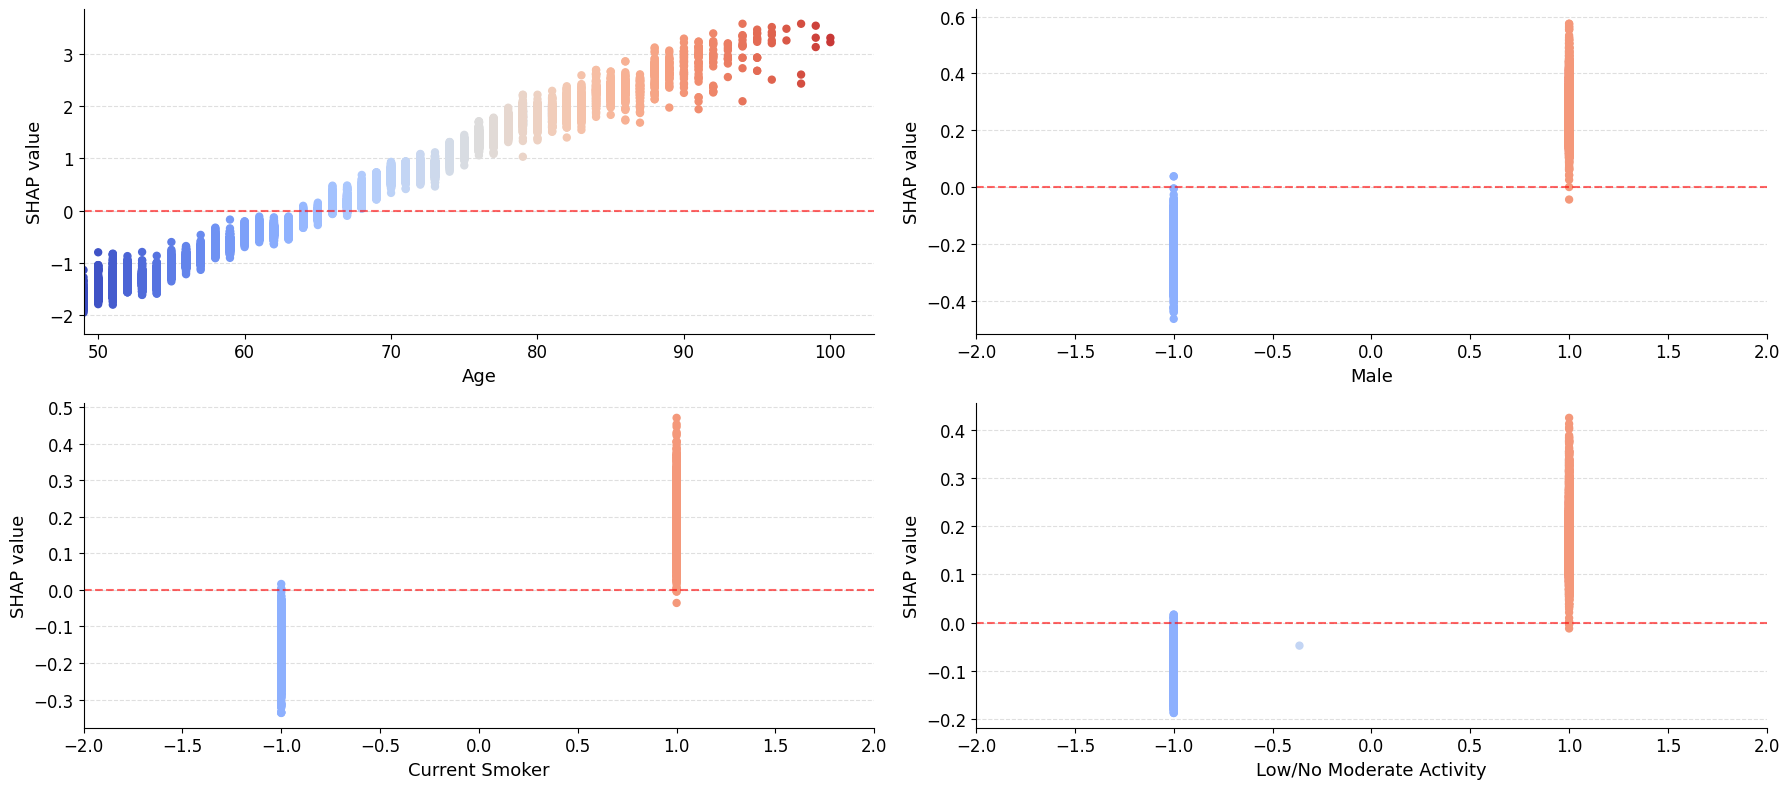

In [11]:
Shap.top_10_scatter_plot(shap_values_test=shap_values_test,var_dict=model_params['var_dict'])

# SuperLearner 

## combination

In [1]:
from src import params
import pandas as pd
from src import Models
from pathlib import Path
from src.Evaluate import metric,print_model_fits,sl_eva
from src import Shap
from src import SuperLearner
import random 

platform = "jupyter"
params.confirm_cwd(platform)
model_params = params.model_params

# specification
model_params['k'] = 10
model_params['y_colname'] = 'death'
domain_name = 'combination_all'
df,model_params['domain_dict'][domain_name] = params.read_merged_data()
model_params['var_dict']['dataset']='Datasource'


cwd: /Users/valler/Python/OX_Thesis/OX_thesis


In [ ]:

df_eva_10_seeds = pd.DataFrame()
for i in range(1,9):
    seed = random.randint(a=1,b=1000000000000)
    model_params['seed']=seed 
    superlearner = SuperLearner.superlearner(data=df,
                            test_size=model_params['test_size'],
                            domain_list=model_params['domain_dict']['combination_all'],
                            y_colname=model_params['y_colname'],
                            k=model_params['k'],
                            random_state=model_params['random_state'])
    df_eva=sl_eva(superlearner)
    df_eva['seed']=[seed]*len(df_eva)
    df_eva_10_seeds=pd.concat([df_eva,df_eva_10_seeds],axis=0)
    

In [13]:
df_eva_10_seeds

,model,pr_auc,roc_auc,f1,efron,ffc,ip,imv,seed
0,XGB,0.674514,0.863575,0.572674,0.342862,0.562336,0.224643,0.139033,581958458618
1,LGB,0.630034,0.840904,0.522448,0.292666,0.528905,0.224643,0.122198,581958458618
2,SGD,0.532138,0.768993,0.527175,-0.171521,0.219749,0.224643,-0.352873,581958458618
3,DecisionTree,0.739439,0.812944,0.707196,0.230866,0.487745,0.224643,-0.352873,581958458618
4,AdaBoost,0.581372,0.816307,0.480286,-0.381784,0.079710,0.224643,-0.242582,581958458618
...,...,...,...,...,...,...,...,...,...
8,KNeighbors,0.594081,0.812407,0.523251,0.226532,0.484858,0.224643,-0.352873,206243973551
9,Bagging,0.810744,0.913088,0.715294,0.502274,0.668506,0.224643,-0.352873,206243973551
10,RandomForest,0.800814,0.910525,0.699271,0.487248,0.658499,0.224643,-0.352873,206243973551
11,ExtraTrees,0.845327,0.923936,0.739791,0.548662,0.699401,0.224643,-0.352873,206243973551


In [12]:
df_eva_10_seeds.to_csv(Path.cwd()/'results/sl_10seeds.csv',index=False)

In [15]:
for seed in df_eva_10_seeds['seed'].unique():
    df_eva_10_seeds.loc[(df_eva_10_seeds['seed']==seed)]

# Domain Contribution

## HRS

In [4]:
domain_name_lst,df_eval,iterations = get_dc_params(model_params['domain_dict'].keys())
domains = model_params['domain_dict']
test_size = model_params['test_size']

pr_f1_contribution
pr_auc_contribution
roc_auc_contribution
imv_contribution


FixedFormatter should only be used together with FixedLocator


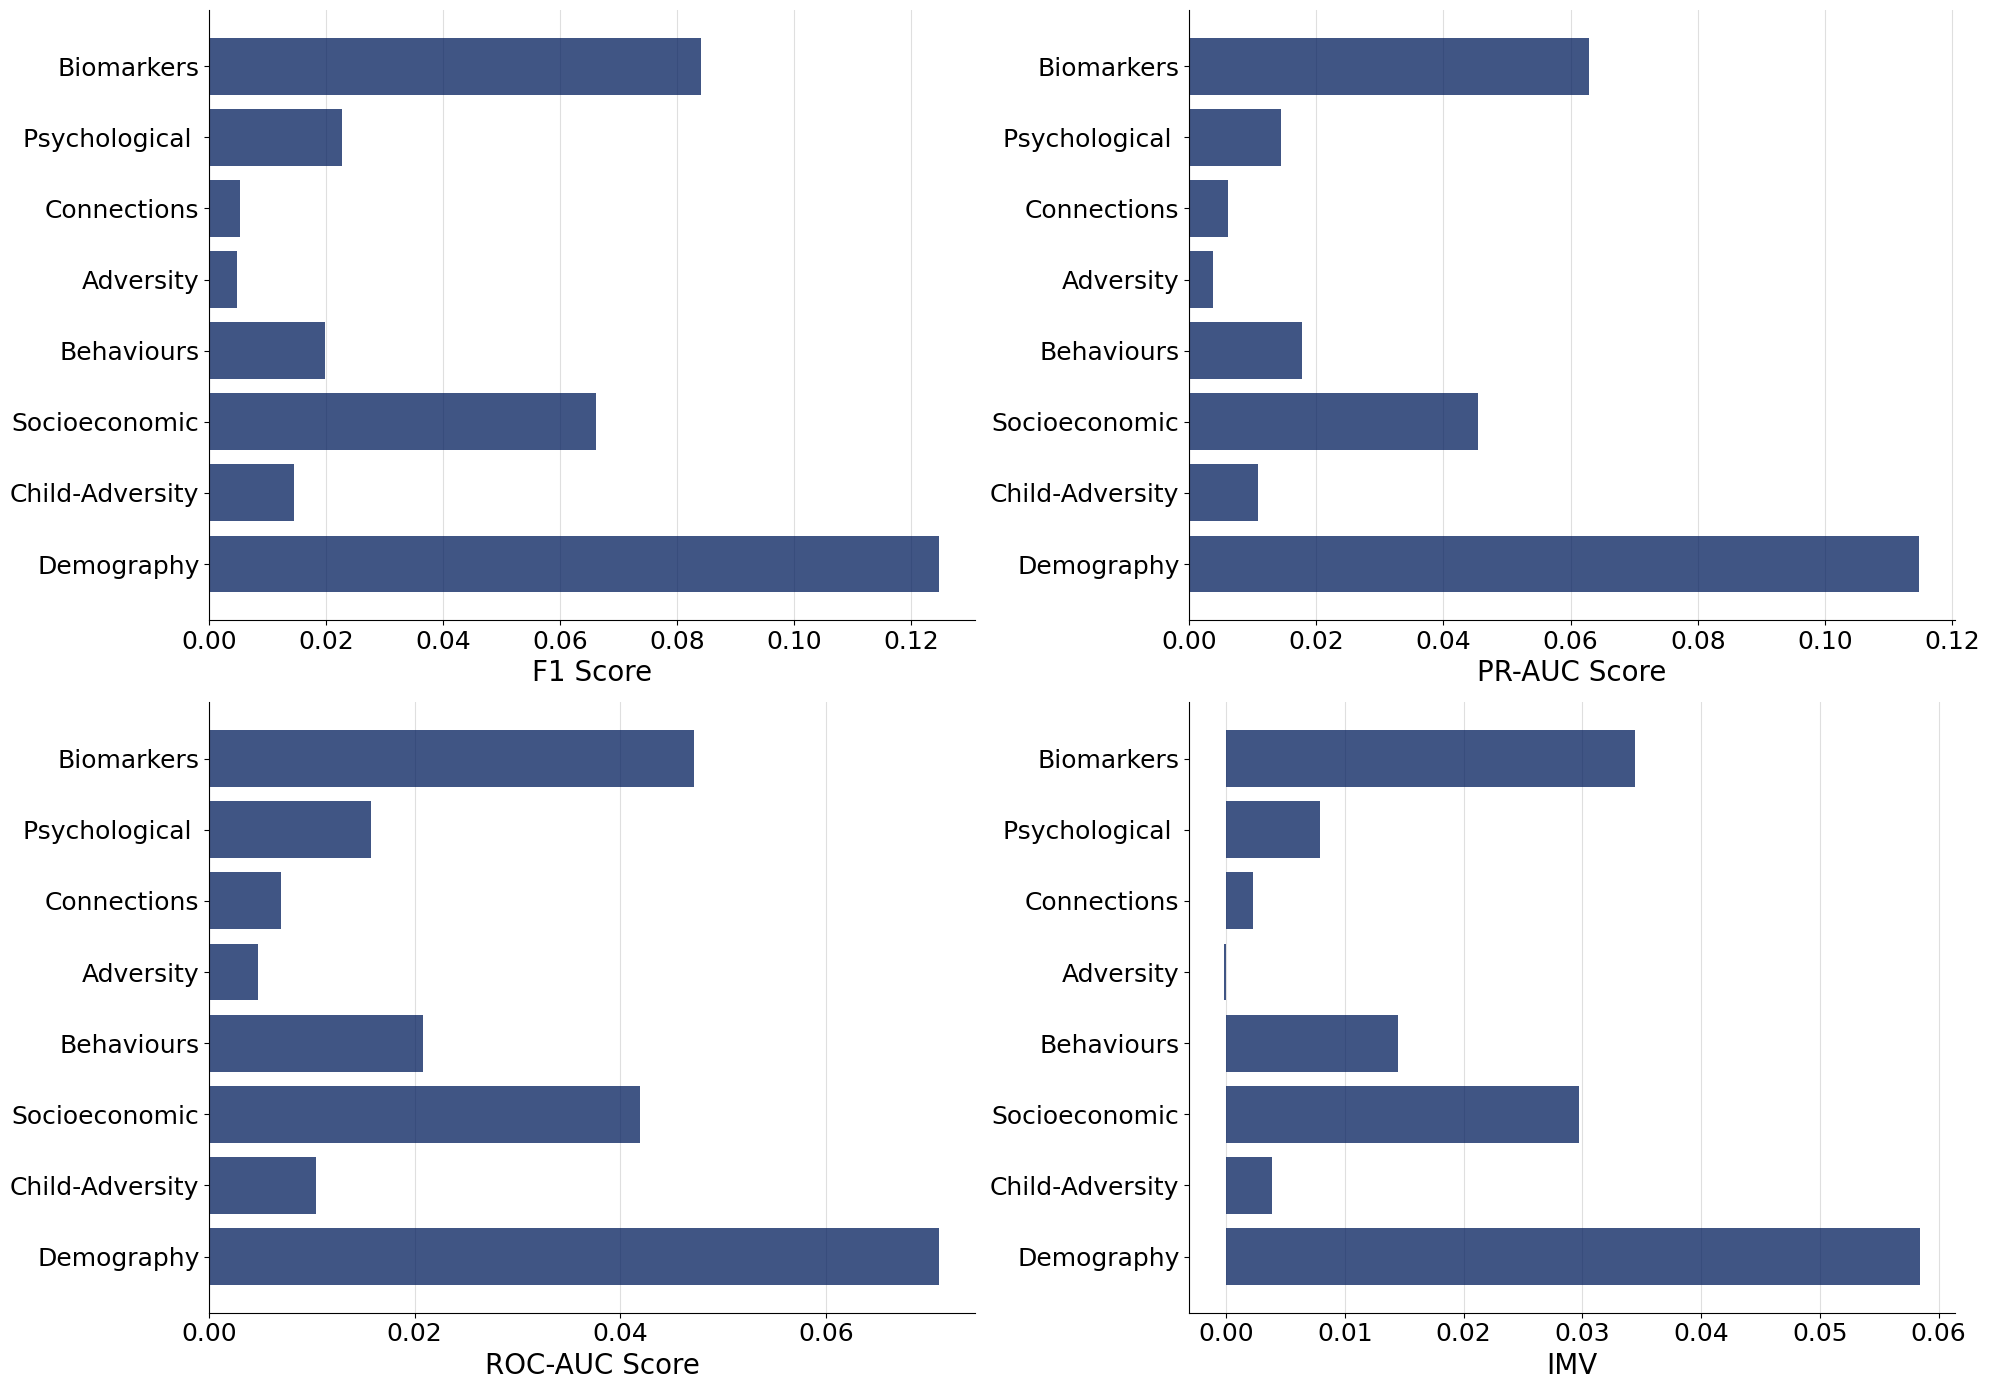

In [36]:
df_eval = dc_iteration(iterations,df_eval,df,model_params)
model_eval_diff,contribution = dd_post_process(domain_name_lst,iterations,df_eval)
dc_plot(contribution,save_control=False)

# Error Investigation 

 HRS as an example 

In [38]:
df = params.data_reader(dataset='HRS',source='us',bio=False)
model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain='all', model='lgb', train_subset_size=1, order=0)

In [52]:
df_invs = pd.DataFrame()
df_invs['true'] =  model.y_test 
df_invs['pred'] =  model.test_set_predict
df_invs['pred_prob'] = model.test_set_predict_prob
df_invs['correct']=[1 if x==y else 0 for x,y in zip(df_error['true'],df_error['pred'])]
df_invs[x.columns] = model.X_test

among the 4073 records in the out-of-sample, 3163 are correct, 
910 incorrect ->
264 fp 
646 fn

In [57]:
df_error=df_invs.loc[df_invs['correct']==0]
df_correct=df_invs.loc[df_invs['correct']==1]

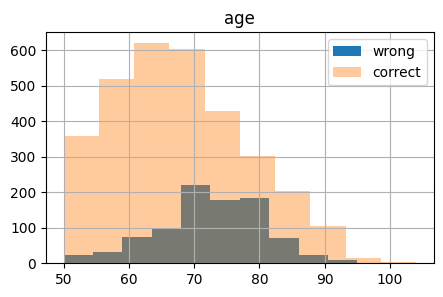

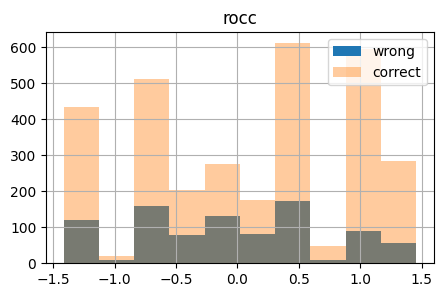

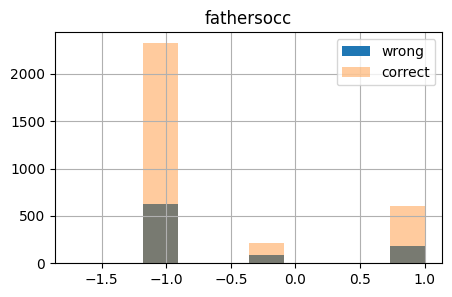

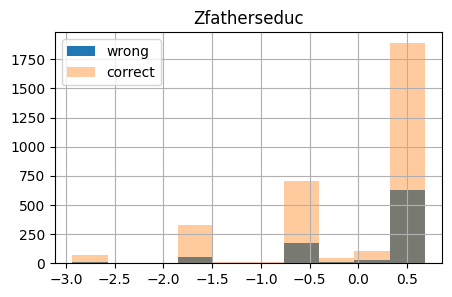

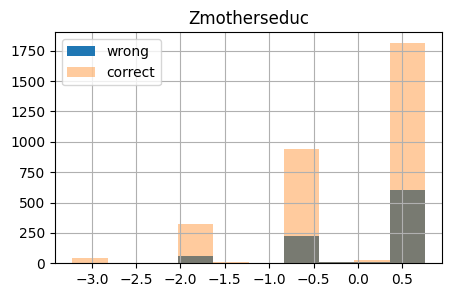

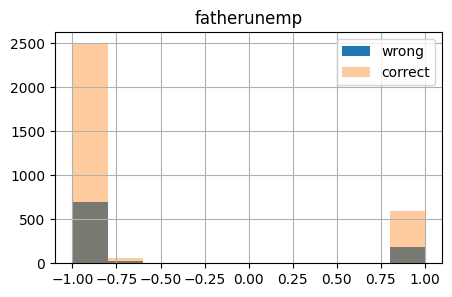

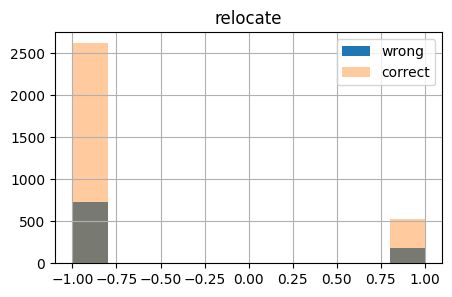

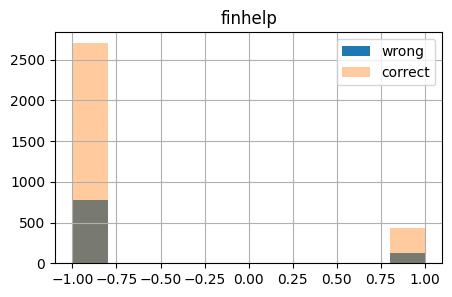

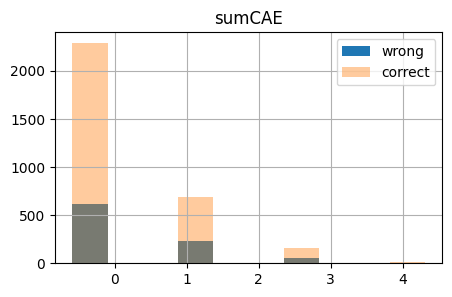

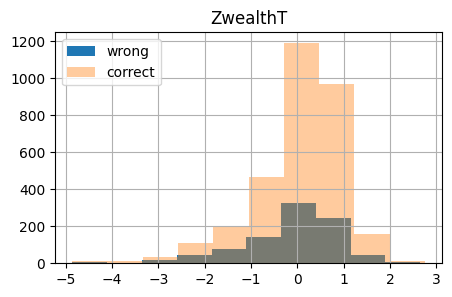

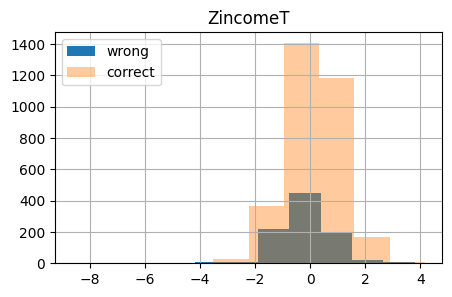

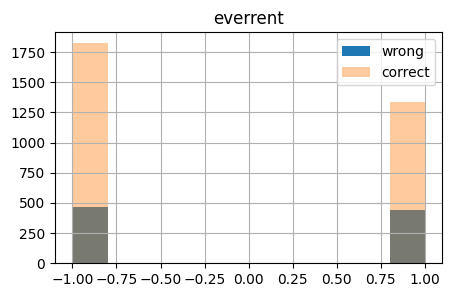

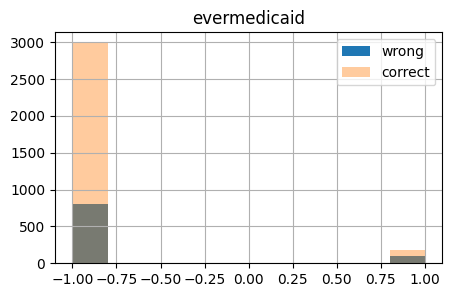

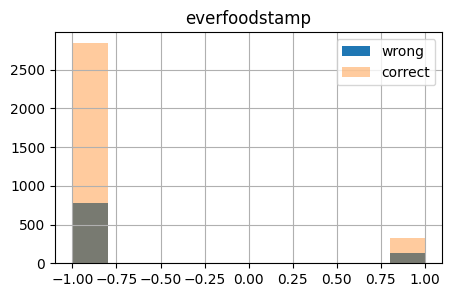

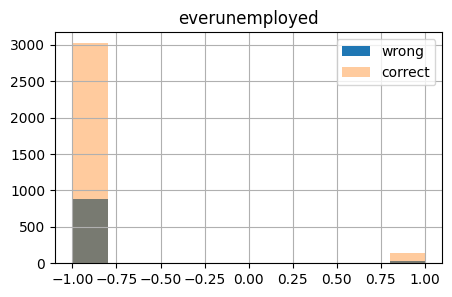

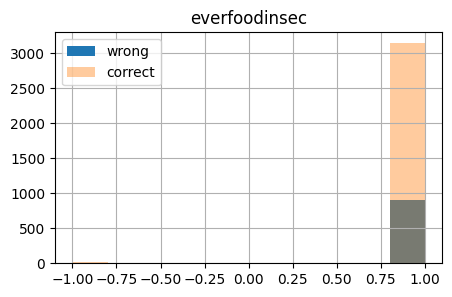

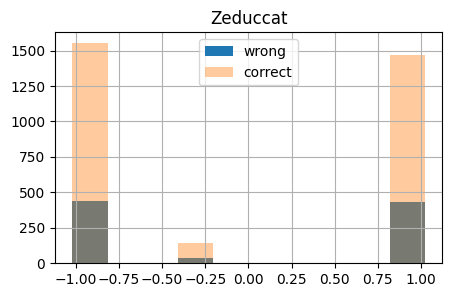

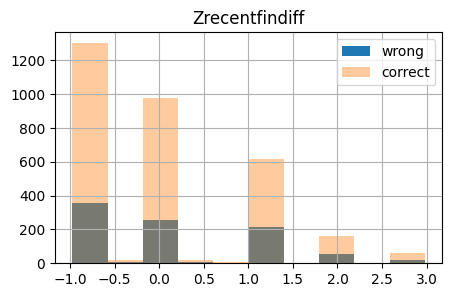

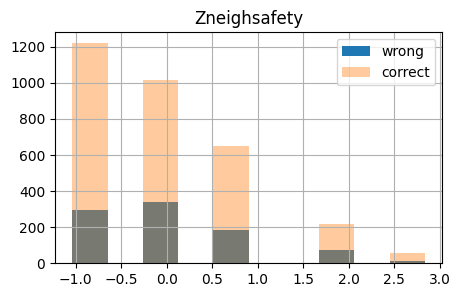

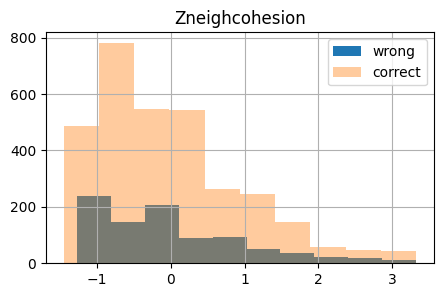

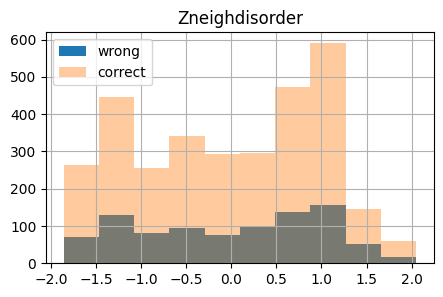

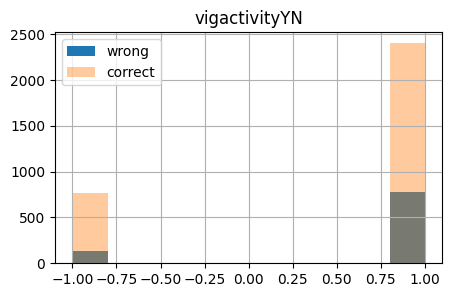

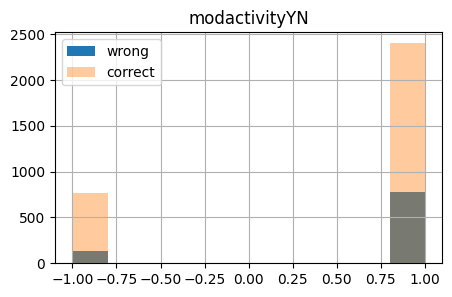

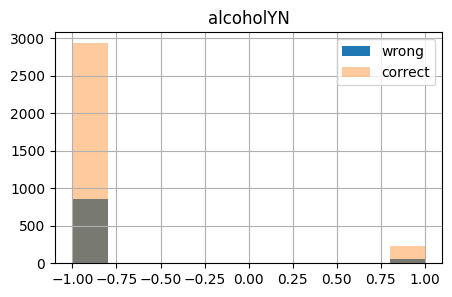

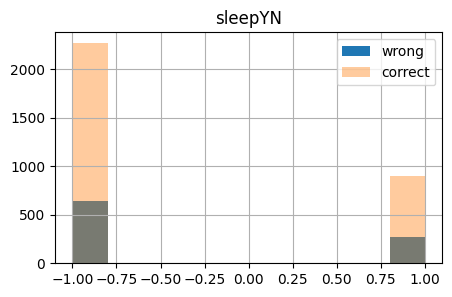

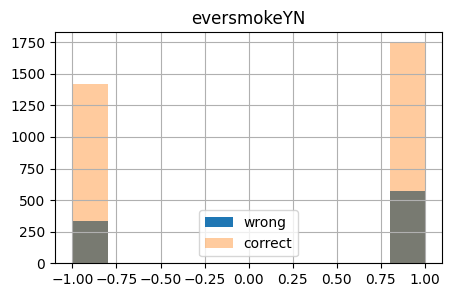

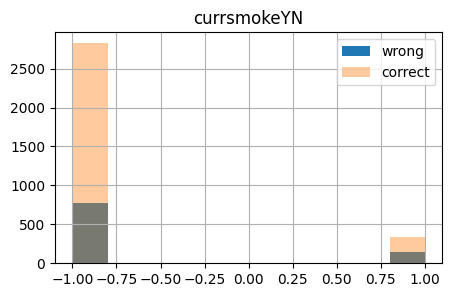

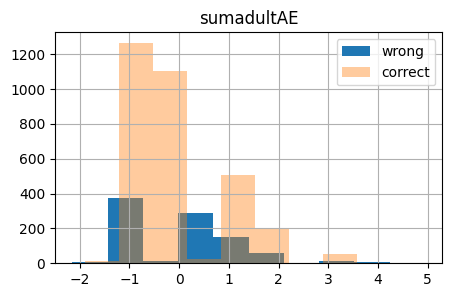

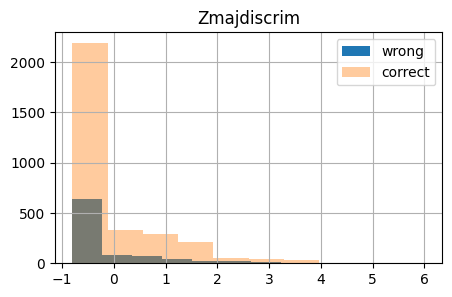

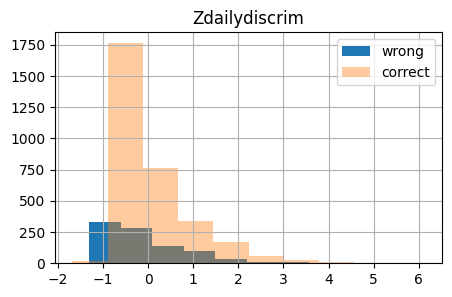

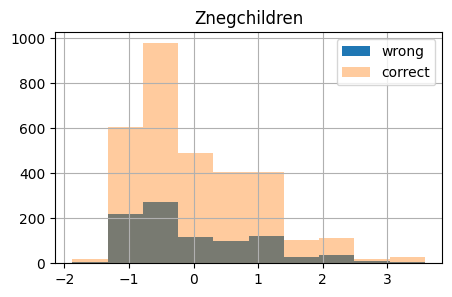

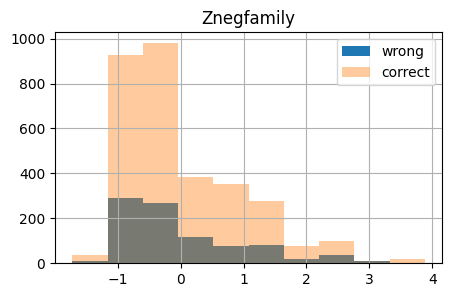

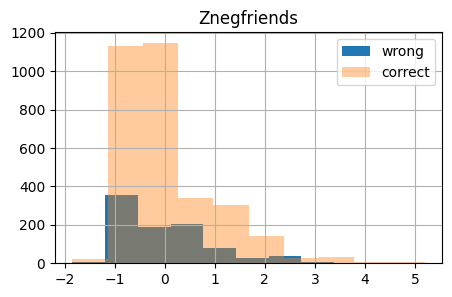

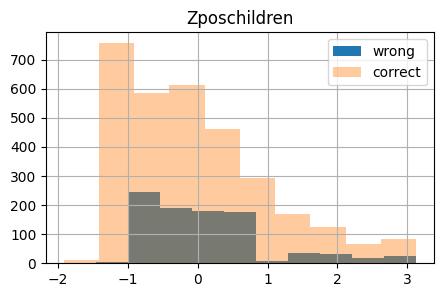

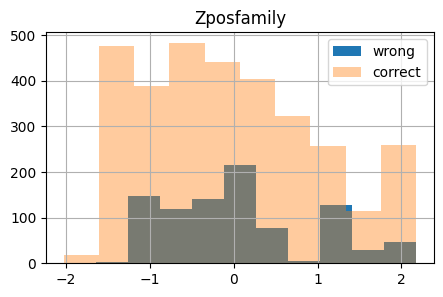

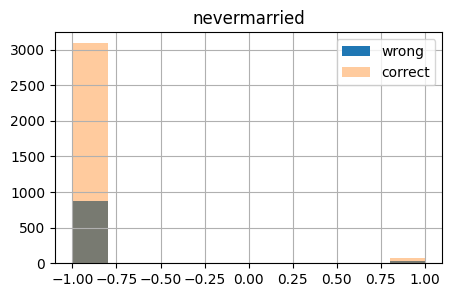

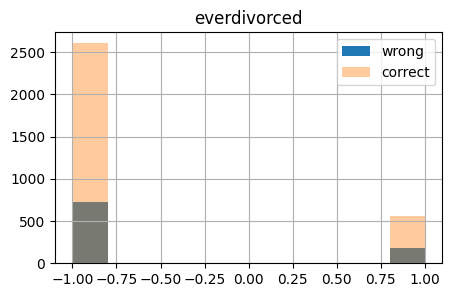

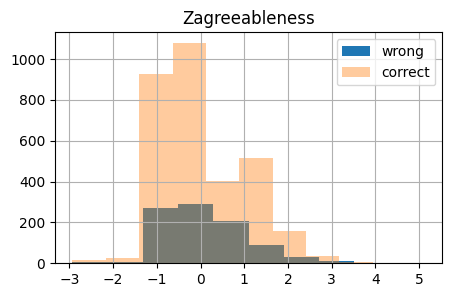

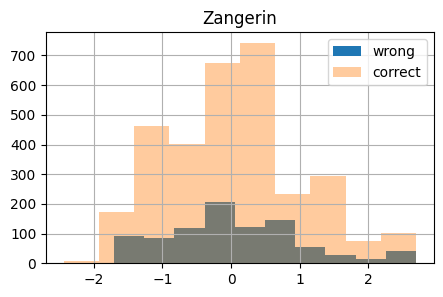

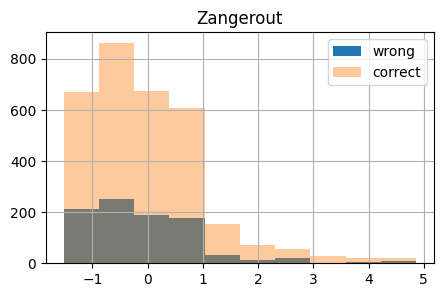

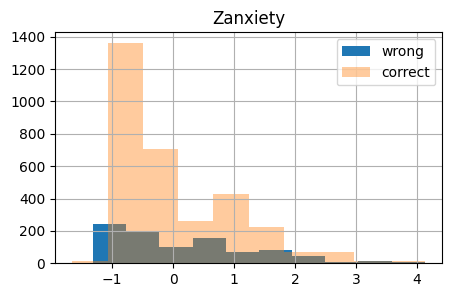

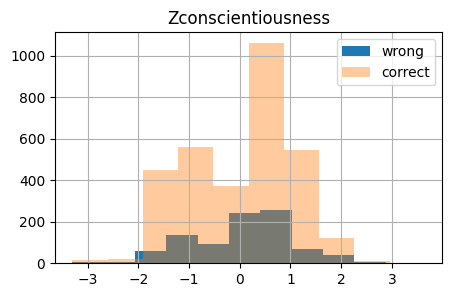

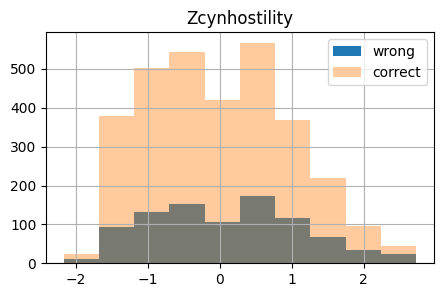

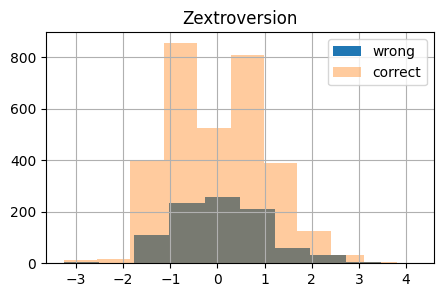

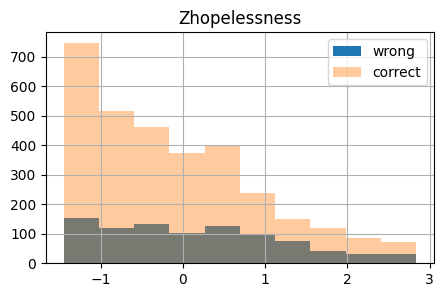

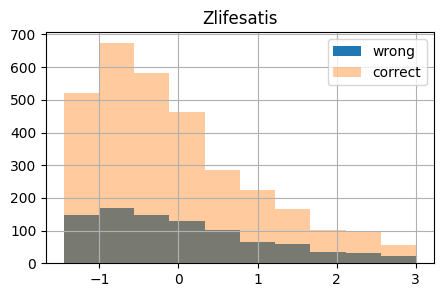

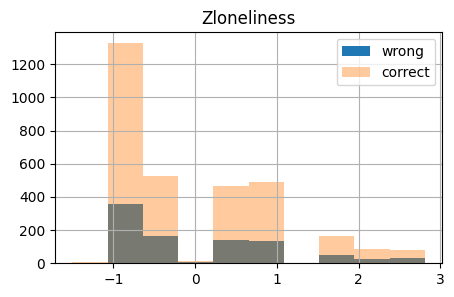

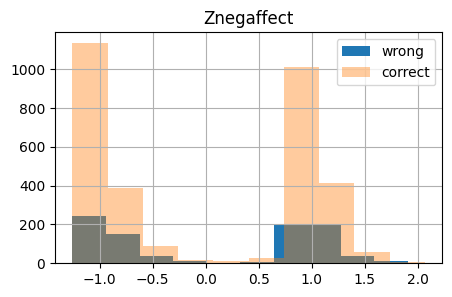

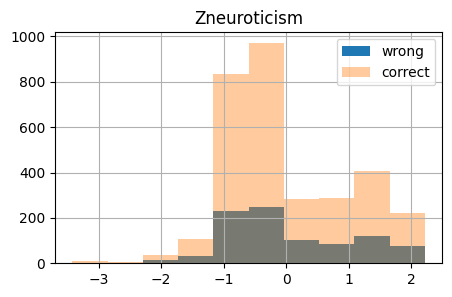

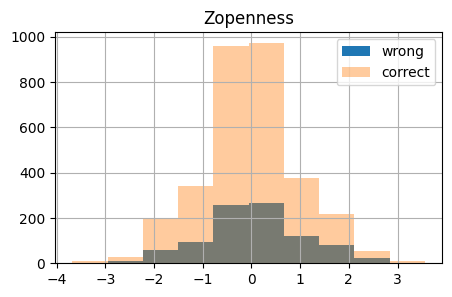

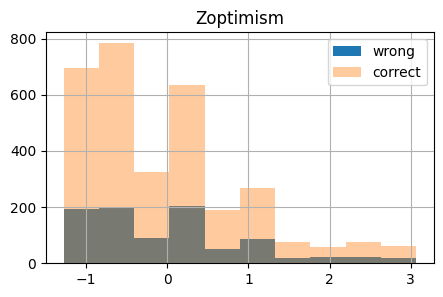

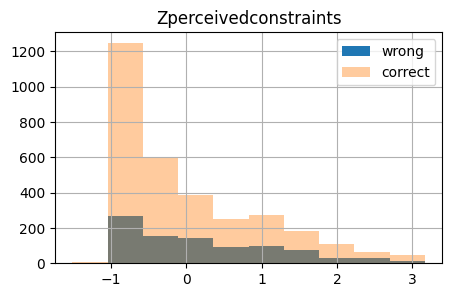

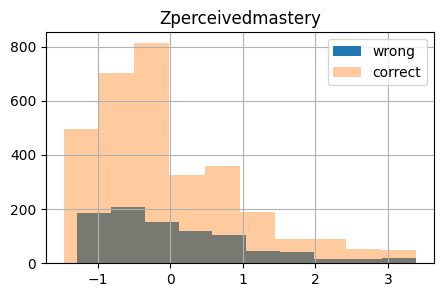

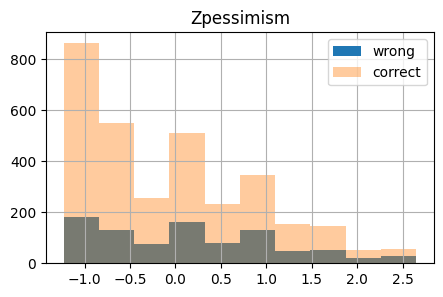

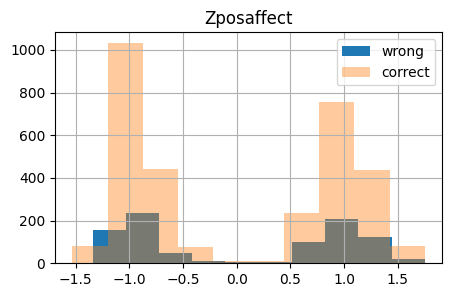

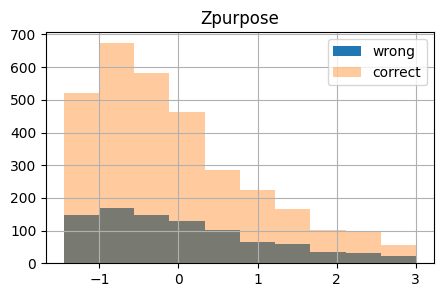

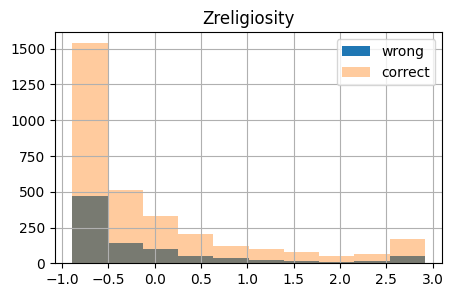

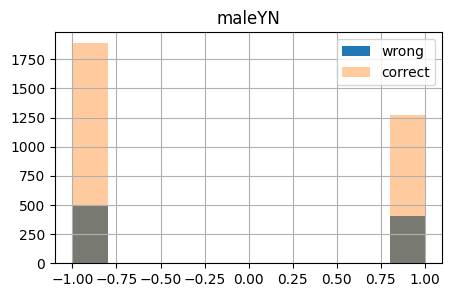

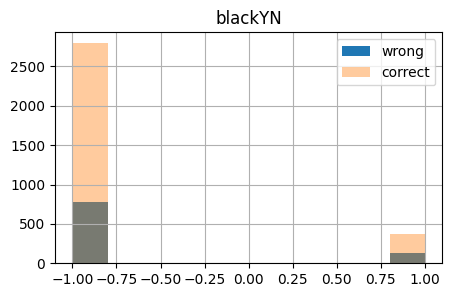

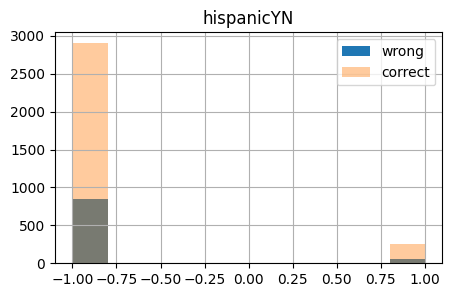

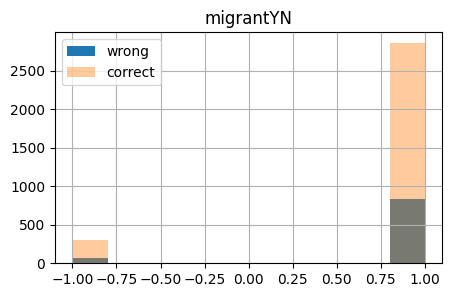

In [81]:
for column in model.X_test.columns:
    # print(column)
    # print(df_error[column].describe())
    fig,ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [5,3]
    df_error[column].hist(ax=ax,label='wrong',alpha=1)
    df_correct[column].hist(ax=ax,label='correct',alpha=0.4)
    ax.set_title(column)
    ax.legend()
    plt.show()
    

In [83]:
# false positive 
df_error_fp = df_error.loc[df_error['true']==0]
# false negative 
df_error_fn = df_error.loc[df_error['true']==1]

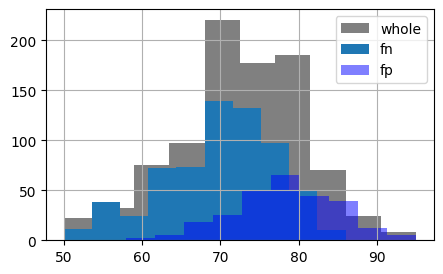

In [100]:
fig,ax = plt.subplots()
df_error.age.hist(ax=ax, label = 'whole',color='grey')
df_error_fn.age.hist(ax=ax, label = 'fn')
df_error_fp.age.hist(ax=ax, label = 'fp',alpha=0.5,color='blue')

ax.legend()

# Age dependent 

# Asymptotics


In [1]:
from src import params
import pandas as pd
from src import Models
from pathlib import Path
from src.Evaluate import metric,print_model_fits,sl_eva,ffc_rsquare,efron_rsquare
from src import Shap
from src import SuperLearner
import random 

platform = "jupyter"
params.confirm_cwd(platform)
model_params = params.model_params


cwd: /Users/valler/Python/OX_Thesis/OX_thesis


## Combination

In [2]:
# read data 
model_params['k'] = 10
model_params['y_colname'] = 'death'
domain_name = 'combination_all'
df,model_params['domain_dict'][domain_name] = params.read_merged_data()
model_params['var_dict']['dataset']='Datasource'


In [7]:
Eva_fixed_test_size = pd.DataFrame(columns=['model', 'var_num','train_subset_size', 'train_auc_score', 'test_auc_score', 'train_f1_score', 'test_f1_score',
                 'test_pr_auc', 'test_pr_no_skill',
                 'train_efron_r2', 'test_efron_r2',
                 'train_ffc_r2', 'test_ffc_r2',
                 'test_briern_r2', 'test_imv_r2'])

In [4]:
start=0.3
end=1.005
step=0.005
model='lgb'
var_set = model_params['domain_dict'][domain_name]

In [8]:
for train_subset_size in np.arange(start, end, step):
    print(train_subset_size)
    for sub_set_size in range(1,len(var_set)+1):
        
        random.seed(1981236101)
        model_params['domain_dict']['sub_set'] = random.sample(var_set,sub_set_size)
        model_=Models.Model_fixed_test_size(data=df, model_params=model_params, domain='sub_set', model=model,
                                             train_subset_size=train_subset_size, order=0)

        eva = metric(model_)
        Eva_fixed_test_size.loc[len(Eva_fixed_test_size)] = [model, sub_set_size,
                                                                         len(model_.X_train),

                                                                         # AUC score
                                                                         eva.test_roc_auc_score_label,
                                                                         eva.auc_score,

                                                                         # F1 score
                                                                         eva.train_f1_score_label,
                                                                         eva.pr_f1,

                                                                         # PR-AUC score
                                                                         eva.pr_auc,
                                                                         eva.pr_no_skill,

                                                                         # Efron_r2
                                                                         efron_rsquare(model_.y_train,
                                                                                               model_.train_set_predict_prob),
                                                                         eva.efron_rsquare,

                                                                         # ffc_r2
                                                                         ffc_rsquare(model_.y_train,
                                                                                              model_.train_set_predict_prob,
                                                                                              model_.y_train),

                                                                         eva.ffc_r2,
                                                                         # brier
                                                                         eva.brier,
                                                                         eva.imv]



0.3
0.305
0.31
0.315
0.32
0.325
0.33
0.335
0.34
0.34500000000000003
0.35000000000000003
0.35500000000000004
0.36000000000000004
0.36500000000000005
0.37000000000000005
0.37500000000000006
0.38000000000000006
0.38500000000000006
0.39000000000000007
0.3950000000000001
0.4000000000000001
0.4050000000000001
0.4100000000000001
0.4150000000000001
0.4200000000000001
0.4250000000000001
0.4300000000000001
0.4350000000000001
0.4400000000000001
0.4450000000000001
0.4500000000000001
0.4550000000000001
0.46000000000000013
0.46500000000000014
0.47000000000000014
0.47500000000000014
0.48000000000000015
0.48500000000000015
0.49000000000000016
0.49500000000000016
0.5000000000000002
0.5050000000000001
0.5100000000000002
0.5150000000000001
0.5200000000000002
0.5250000000000001
0.5300000000000002
0.5350000000000001
0.5400000000000003
0.5450000000000002
0.5500000000000003
0.5550000000000002
0.5600000000000003
0.5650000000000002
0.5700000000000003
0.5750000000000002
0.5800000000000003
0.5850000000000002
0.5

Visualisation

In [13]:
Eva_fixed_test_size

,model,var_num,train_subset_size,train_auc_score,test_auc_score,train_f1_score,test_f1_score,test_pr_auc,test_pr_no_skill,train_efron_r2,test_efron_r2,train_ffc_r2,test_ffc_r2,test_briern_r2,test_imv_r2
0,lgb,1,11952,0.500000,0.521476,0.000000,0.000000,0.450563,0.221804,0.001350,0.001124,0.001350,0.029827,0.175457,0.000687
1,lgb,2,11952,0.505492,0.590121,0.044299,0.029993,0.301951,0.221804,0.046236,0.019300,0.046236,0.047481,0.172264,0.009156
2,lgb,3,11952,0.512628,0.649224,0.130796,0.069673,0.339975,0.221804,0.143673,0.045117,0.143673,0.072557,0.167730,0.023056
3,lgb,4,11952,0.519514,0.650102,0.178965,0.100786,0.344611,0.221804,0.152818,0.046852,0.152818,0.074241,0.167425,0.023761
4,lgb,5,11952,0.645245,0.806924,0.559212,0.450948,0.570113,0.221804,0.358758,0.235667,0.358758,0.257630,0.134259,0.100173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,lgb,22,39841,0.676112,0.838336,0.565082,0.511212,0.625977,0.224643,0.362126,0.287897,0.362126,0.525728,0.125084,0.120690
3662,lgb,23,39841,0.677491,0.841193,0.564840,0.513575,0.630108,0.224643,0.365938,0.293450,0.365938,0.529426,0.124109,0.122409
3663,lgb,24,39841,0.681954,0.841272,0.571905,0.522217,0.633377,0.224643,0.367783,0.295514,0.367783,0.530801,0.123746,0.122743
3664,lgb,25,39841,0.681954,0.841272,0.571905,0.522217,0.633377,0.224643,0.367783,0.295514,0.367783,0.530801,0.123746,0.122743


In [10]:
Eva_fixed_test_size.to_csv(Path.cwd()/'results/asymptotics_lgb_with_random_sampling_on_vars_seed_specified.csv',index=False)

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


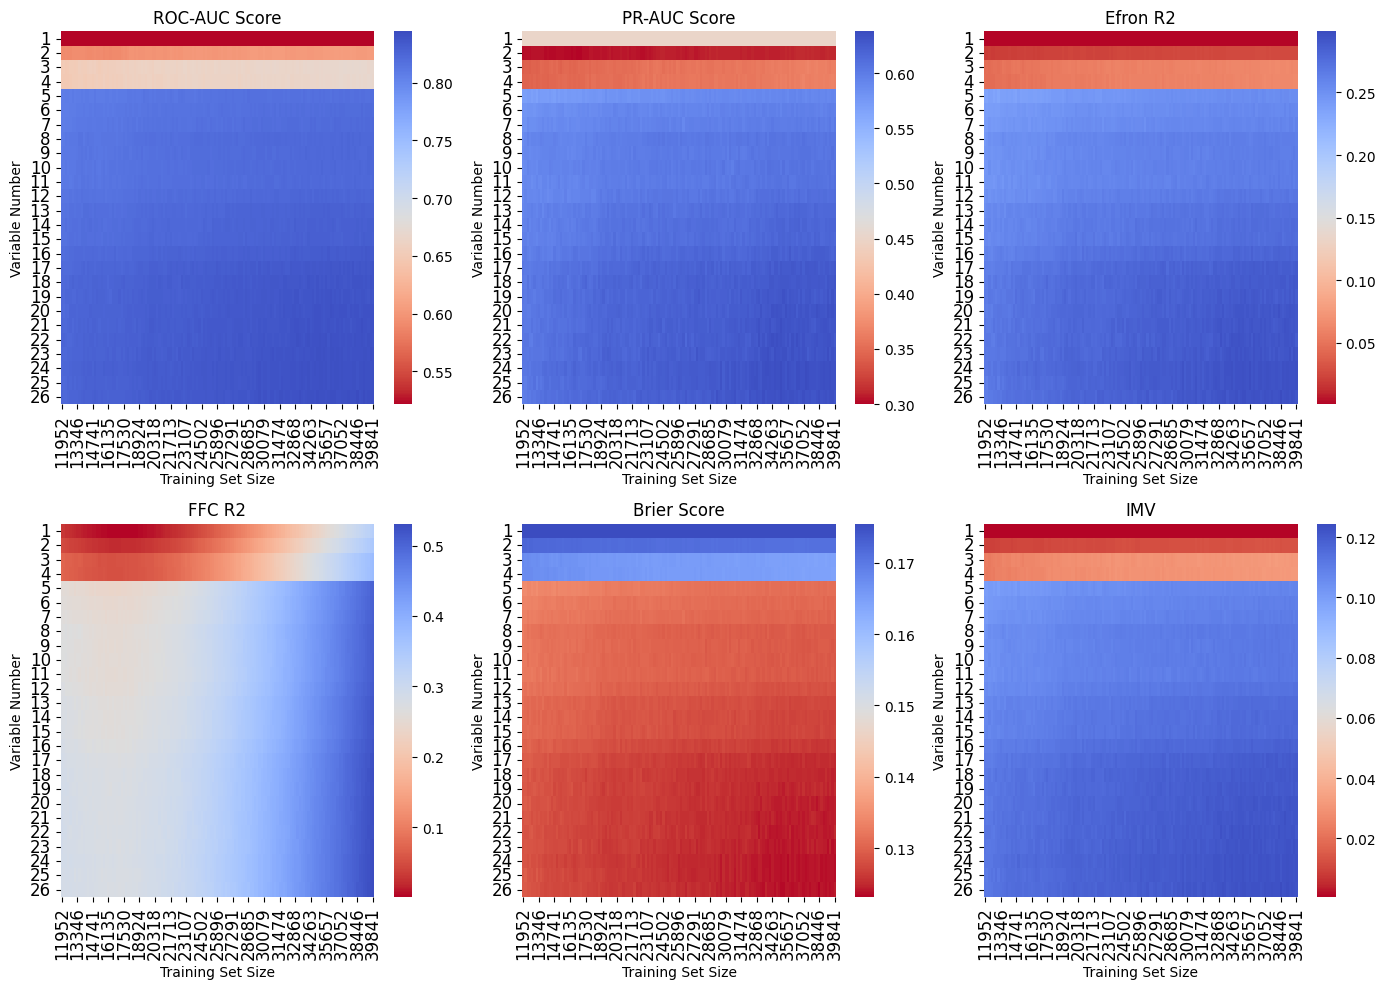

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


columns = []
for column in Eva_fixed_test_size.columns:
    if 'test' in column:
        columns.append(column)

df_to_plot = Eva_fixed_test_size.copy()

columns.remove('test_f1_score')
columns.remove('test_pr_no_skill')

ploted_col_dict = {'test_auc_score': 'ROC-AUC Score',
                   'test_efron_r2': 'Efron R2',
                   'test_pr_auc': 'PR-AUC Score',
                   'test_ffc_r2': 'FFC R2',
                   'test_briern_r2': 'Brier Score',
                   'test_imv_r2': 'IMV'}



fig, axis = plt.subplots(2, 3)
fontsize_ticks = 12
fontsize_labels = 15
fig.subplots_adjust(left=0.08, bottom=0.08, top=0.95, right=0.99)
plt.rcParams['figure.figsize'] = [14, 10]


count = 0
for (m, n), subplot in np.ndenumerate(axis):
    metric = columns[count]
    pivot_table = df_to_plot.pivot('var_num', 'train_subset_size', metric)
    sns.heatmap(pivot_table, ax=axis[m, n],cmap='coolwarm_r')
    
    
    axis[m, n].set_ylabel('Variable Number')
    axis[m, n].set_xlabel('Training Set Size')
    axis[m, n].set_title(ploted_col_dict[metric])#, size=fontsize_labels)
    
    axis[m, n].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
    axis[m, n].spines['top'].set_visible(False)
    axis[m, n].spines['right'].set_visible(False)
    axis[m, n].grid(axis='both', alpha=0.4)
    axis[m, n].set_axisbelow(True)
    count += 1
fig.tight_layout()
plt.show()


## Superlearner Version 

In [2]:
from src import params
import pandas as pd
from src import Models
from pathlib import Path
from src.Evaluate import metric,print_model_fits,sl_eva,sl_only_eva
from src import Shap
from src import SuperLearner
import random 

platform = "jupyter"
params.confirm_cwd(platform)
model_params = params.model_params

# specification
model_params['k'] = 5
model_params['y_colname'] = 'death'
domain_name = 'combination_all'
df,model_params['domain_dict'][domain_name] = params.read_merged_data()
model_params['var_dict']['dataset']='Datasource'


cwd: /Users/valler/Python/OX_Thesis/OX_thesis


In [13]:
start=0.3
end=1.05
step=0.5
model='sl'
var_set = model_params['domain_dict'][domain_name]

In [14]:
Eva_fixed_test_size_sl = pd.DataFrame(columns=['model', 'var_num','train_subset_size', 'test_auc_score', 'test_f1_score',
                 'test_pr_auc', 'test_pr_no_skill', 'test_efron_r2', 'test_ffc_r2','test_briern_r2', 'test_imv_r2'])


In [15]:

for train_subset_size in np.arange(start, end, step):
    print(train_subset_size)
    for sub_set_size in range(1,len(var_set)+1):
        
        random.seed(1981236101)
        model_params['domain_dict']['sub_set'] = random.sample(var_set,sub_set_size)
        seed = random.randint(a=1,b=1000000000000)
        model_params['seed']=seed 
        superlearner = SuperLearner.superlearner(data=df,
                                test_size=model_params['test_size'],
                                domain_list=model_params['domain_dict']['sub_set'],
                                y_colname=model_params['y_colname'],
                                k=model_params['k'],
                                random_state=model_params['random_state'])
        sl_eva = sl_only_eva(superlearner)
        Eva_fixed_test_size_sl.loc[len(Eva_fixed_test_size_sl)] = ['sl', 
                                                             sub_set_size,
                                                             int(len(df)*train_subset_size),
                                                             sl_eva['test_auc_score'],
                                                             sl_eva['test_f1_score'],
                                                             sl_eva['test_pr_auc'],
                                                             sl_eva['test_pr_no_skill'],
                                                             sl_eva['test_efron_r2'],
                                                             sl_eva['test_ffc_r2'],
                                                             sl_eva['test_briern_r2'],
                                                            sl_eva['test_imv_r2']]




0.3
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


fold 1
fold 2
fold 3
fold 4
fold 5


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.35
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


0.39999999999999997
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


fold 1
fold 2
fold 3
fold 4
fold 5
fold 1
fold 2
fold 3
fold 4
fold 5


Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


fold 1
fold 2
fold 3


KeyboardInterrupt: 

In [16]:
Eva_fixed_test_size_sl

,model,var_num,train_subset_size,test_auc_score,test_f1_score,test_pr_auc,test_pr_no_skill,test_efron_r2,test_ffc_r2,test_briern_r2,test_imv_r2
0,sl,1,17075,0.613520,0.083475,0.340997,0.224643,0.044348,0.363520,0.044348,0.021175
1,sl,2,17075,0.642879,0.173701,0.386378,0.224643,0.070499,0.380937,0.070499,0.033229
2,sl,3,17075,0.653185,0.206246,0.400818,0.224643,0.080728,0.387750,0.080728,0.038023
3,sl,4,17075,0.637589,0.118391,0.368242,0.224643,0.057217,0.372091,0.057217,0.027426
4,sl,5,17075,0.659886,0.230516,0.413210,0.224643,0.082476,0.388915,0.082476,0.036765
...,...,...,...,...,...,...,...,...,...,...,...
68,sl,17,22766,0.911400,0.635627,0.811966,0.224643,0.494960,0.663636,0.494960,0.182491
69,sl,18,22766,0.914637,0.630169,0.817890,0.224643,0.505623,0.670737,0.505623,0.185576
70,sl,19,22766,0.939152,0.718985,0.869170,0.224643,0.590192,0.727061,0.590192,0.208725
71,sl,20,22766,0.938324,0.726844,0.869666,0.224643,0.590869,0.727512,0.590869,0.208833


In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


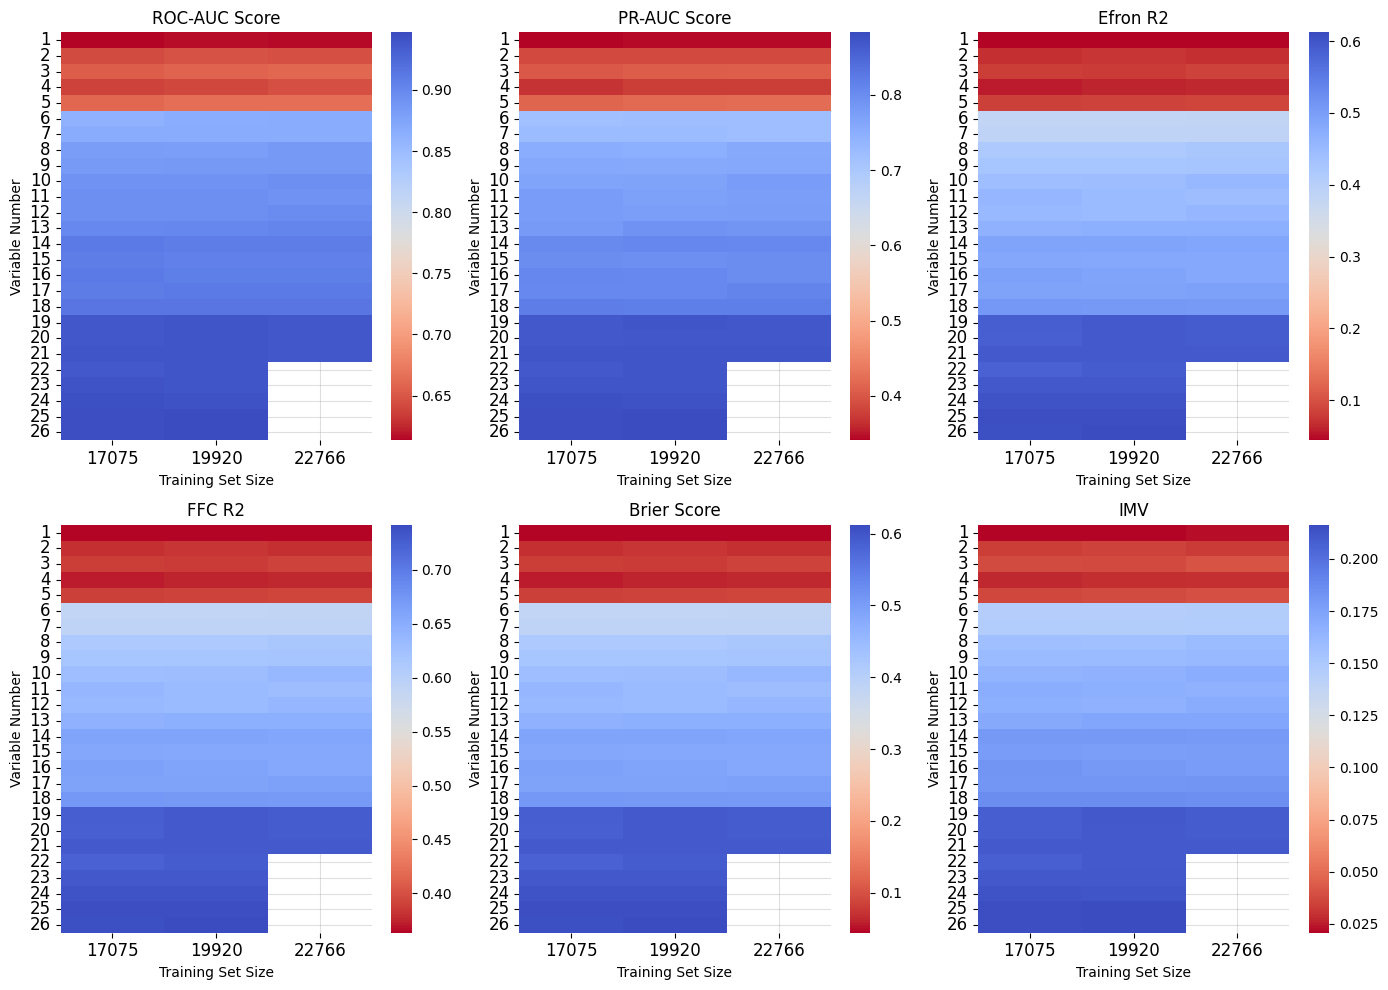

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


columns = []
for column in Eva_fixed_test_size.columns:
    if 'test' in column:
        columns.append(column)

df_to_plot = Eva_fixed_test_size.copy()

columns.remove('test_f1_score')
columns.remove('test_pr_no_skill')

ploted_col_dict = {'test_auc_score': 'ROC-AUC Score',
                   'test_efron_r2': 'Efron R2',
                   'test_pr_auc': 'PR-AUC Score',
                   'test_ffc_r2': 'FFC R2',
                   'test_briern_r2': 'Brier Score',
                   'test_imv_r2': 'IMV'}



fig, axis = plt.subplots(2, 3)
fontsize_ticks = 12
fontsize_labels = 15
fig.subplots_adjust(left=0.08, bottom=0.08, top=0.95, right=0.99)
plt.rcParams['figure.figsize'] = [14, 10]


count = 0
for (m, n), subplot in np.ndenumerate(axis):
    metric = columns[count]
    pivot_table = df_to_plot.pivot('var_num', 'train_subset_size', metric)
    sns.heatmap(pivot_table, ax=axis[m, n],cmap='coolwarm_r')
    
    
    axis[m, n].set_ylabel('Variable Number')
    axis[m, n].set_xlabel('Training Set Size')
    axis[m, n].set_title(ploted_col_dict[metric])#, size=fontsize_labels)
    
    axis[m, n].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
    axis[m, n].spines['top'].set_visible(False)
    axis[m, n].spines['right'].set_visible(False)
    axis[m, n].grid(axis='both', alpha=0.4)
    axis[m, n].set_axisbelow(True)
    count += 1
fig.tight_layout()
plt.show()
